In [3]:
# @title Import Libraries & download file
import kagglehub
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Download latest version
path = kagglehub.dataset_download("juhibhojani/house-price")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/house-price


In [4]:
# @title Read File
df1 = pd.read_csv(f'{path}/house_prices.csv')
df1.head()

Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1  One can find this stunning 2 BHK flat for sale...           98 Lac    
2  Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3  This beautiful 1 BHK Flat is available for sal...           25 Lac    
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    

   Price (in rupees) location Carpet Area         Status         Floor  \
0             6000.0    thane    500 sqft  Ready to Move  10 out of 11   
1            13799.0    thane    473 sqft  Ready to Move   3 out of 22   
2            17500.0    thane    779 sqft  Ready to Move  10 out of 29   
3                NaN    thane    530 sqft  Ready to Move    1 out of 3   
4            18824.0    thane    635 sqft  Ready to Move  20 out of 42   

  Transaction  ... facing             overlooking  \
0      Resale  ...    NaN                     NaN   
1      Resale  ...   East             Garden/Park   
2      Resale  ...   East             Garden/Park   
3      Resale  ...    NaN                     NaN   
4      Resale  ...   West  Garden/Park, Main Road   

                               Society Bathroom Balcony Car Parking  \
0  Srushti Siddhi Mangal Murti Complex        1       2         NaN   
1                          Dosti Vihar        2     NaN      1 Open   
2                 Sunrise by Kalpataru        2     NaN   1 Covered   
3                                  NaN        1       1         NaN   
4          TenX Habitat Raymond Realty        2     NaN   1 Covered   

              Ownership Super Area Dimensions  Plot Area  
0                   NaN        NaN        NaN        NaN  
1              Freehold        NaN        NaN        NaN  
2              Freehold        NaN        NaN        NaN  
3                   NaN        NaN        NaN        NaN  
4  Co-operative Society        NaN        NaN        NaN  

[5 rows x 21 columns]

# Preprocessing Scaling

In [5]:
# @title Fix Amount(in rupees) (scaling) τις μοναδες μετρησεις
# Συνάρτηση για να μετατρέψουμε τις τιμές από Lac ή Cr σε αριθμούς και να χειριστούμε την τιμή "Call for price"
def convert_amount(amount):
    # Αν η τιμή είναι "Call for price", επιστρέφουμε NaN
    if isinstance(amount, str) and "Call for Price" in amount:
        return np.nan

    # Έλεγχος για την περίπτωση "Lac" ή "Cr"
    match_lac = re.search(r'(\d+(\.\d+)?)\s*Lac', amount)
    match_cr = re.search(r'(\d+(\.\d+)?)\s*Cr', amount)

    if match_lac:
        return float(match_lac.group(1)) * 100000  # Μετατροπή από Lac σε αριθμό
    elif match_cr:
        return float(match_cr.group(1)) * 10000000  # Μετατροπή από Cr σε αριθμό
    return None

# Εφαρμόζουμε τη συνάρτηση στην στήλη 'Amount(in rupees)'
df1['Amount(in rupees)'] = df1['Amount(in rupees)'].apply(convert_amount)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df1.to_csv('scaled_house_prices.csv', index=False)

df_scaled = pd.read_csv('scaled_house_prices.csv')
print(df_scaled[['Amount(in rupees)']].head())

   Amount(in rupees)
0          4200000.0
1          9800000.0
2         14000000.0
3          2500000.0
4         16000000.0


In [6]:
# @title Fix Super Area(scaling) τις μοναδες μετρησεις

df_scaled = pd.read_csv('scaled_house_prices.csv')

# Συνάρτηση για να αφαιρούμε τα κόμματα και τις τελείες και να μετατρέπουμε τις μονάδες σε sqft
def convert_super_area(area):
    # Εξασφαλίζουμε ότι η τιμή είναι σε μορφή string
    area = str(area).replace(',', '').replace('.', '')  # Αφαιρούμε κόμματα και τελείες

    # Αν η μονάδα είναι sqm, μετατρέπουμε σε sqft
    if 'sqm' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 10.7639  # sqm -> sqft
    # Αν η μονάδα είναι sqyrd, μετατρέπουμε σε sqft
    elif 'sqyrd' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 9  # sqyrd -> sqft
    # Αν η μονάδα είναι marla, μετατρέπουμε σε sqft
    elif 'marla' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 272.25  # marla -> sqft
    # Αν η μονάδα είναι kanal, μετατρέπουμε σε sqft
    elif 'kanal' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 5445  # kanal -> sqft
    # Αν η μονάδα είναι ground, μετατρέπουμε σε sqft
    elif 'ground' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 2400  # ground -> sqft
    # Αν η μονάδα είναι biswa, μετατρέπουμε σε sqft
    elif 'biswa' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 450  # biswa -> sqft
    # Αν η μονάδα είναι aankadam, μετατρέπουμε σε sqft (αν δεν γνωρίζουμε ακριβώς την αντιστοιχία, βάζουμε 1 ή τροποποιούμε αργότερα)
    elif 'aankadam' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 1  # Στην περίπτωση που δεν ξέρουμε την αντιστοιχία
    # Αν η μονάδα είναι acre, μετατρέπουμε σε sqft
    elif 'acre' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 43560  # acre -> sqft
    # Αν η μονάδα είναι hectare, μετατρέπουμε σε sqft
    elif 'hectare' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 107639.104  # hectare -> sqft
    # Αν η μονάδα είναι cent, μετατρέπουμε σε sqft
    elif 'cent' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 435.6  # cent -> sqft
    # Αν η μονάδα είναι ήδη sqft ή κάτι άλλο
    elif 'sqft' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))  # Αφαιρούμε οποιαδήποτε μη αριθμητικά στοιχεία
        return area_value
    else:
        # Επιστρέφουμε τον αριθμό αν δεν υπάρχουν μονάδες
        return float(area)

# Εφαρμόζουμε τη συνάρτηση στην στήλη 'Super Area'
df_scaled['Super Area'] = df_scaled['Super Area'].apply(convert_super_area)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df_scaled.to_csv('scaled_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
print(df_scaled[['Super Area']].head())


   Super Area
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN


In [7]:
# @title Fix Carpet Area(scaling) τις μοναδες μετρησεις

# Συνάρτηση για να αφαιρούμε τα κόμματα και τις τελείες και να μετατρέπουμε τις μονάδες σε sqft
def convert_carpet_area(area):
    # Εξασφαλίζουμε ότι η τιμή είναι σε μορφή string
    area = str(area).replace(',', '').replace('.', '')  # Αφαιρούμε κόμματα και τελείες

    # Αν η μονάδα είναι sqm, μετατρέπουμε σε sqft
    if 'sqm' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 10.7639  # sqm -> sqft
    # Αν η μονάδα είναι sqyrd, μετατρέπουμε σε sqft
    elif 'sqyrd' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 9  # sqyrd -> sqft
    # Αν η μονάδα είναι marla, μετατρέπουμε σε sqft
    elif 'marla' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 272.25  # marla -> sqft
    # Αν η μονάδα είναι kanal, μετατρέπουμε σε sqft
    elif 'kanal' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 5445  # kanal -> sqft
    # Αν η μονάδα είναι ground, μετατρέπουμε σε sqft
    elif 'ground' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 2400  # ground -> sqft
    # Αν η μονάδα είναι biswa, μετατρέπουμε σε sqft
    elif 'biswa' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 450  # biswa -> sqft
    # Αν η μονάδα είναι aankadam, μετατρέπουμε σε sqft (αν δεν γνωρίζουμε ακριβώς την αντιστοιχία, βάζουμε 1 ή τροποποιούμε αργότερα)
    elif 'aankadam' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 1  # Στην περίπτωση που δεν ξέρουμε την αντιστοιχία
    # Αν η μονάδα είναι acre, μετατρέπουμε σε sqft
    elif 'acre' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 43560  # acre -> sqft
    # Αν η μονάδα είναι hectare, μετατρέπουμε σε sqft
    elif 'hectare' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 107639.104  # hectare -> sqft
    # Αν η μονάδα είναι cent, μετατρέπουμε σε sqft
    elif 'cent' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 435.6  # cent -> sqft
    # Αν η μονάδα είναι ήδη sqft ή κάτι άλλο
    elif 'sqft' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))  # Αφαιρούμε οποιαδήποτε μη αριθμητικά στοιχεία
        return area_value
        # Αν η μονάδα είναι bigha, μετατρέπουμε σε sqft
    elif 'bigha' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 14400  # bigha -> sqft (τιμή κατά προσέγγιση, μπορεί να διαφέρει ανά περιοχή)
    else:
        # Επιστρέφουμε τον αριθμό αν δεν υπάρχουν μονάδες
        return float(area)

# Εφαρμόζουμε τη συνάρτηση στην στήλη 'Super Area'
df_scaled['Carpet Area'] = df_scaled['Carpet Area'].apply(convert_carpet_area)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df_scaled.to_csv('scaled_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
print(df_scaled[['Carpet Area']].head())


   Carpet Area
0        500.0
1        473.0
2        779.0
3        530.0
4        635.0


In [8]:
# @title Add new Column Total Area (combination of carpet+super area)

# Ελέγχουμε τις πρώτες γραμμές του αρχείου για να δούμε τη δομή των δεδομένων
print("Πρώτες γραμμές του αρχείου:")
print(df_scaled.head())

# Μετατρέπουμε τις στήλες σε αριθμητικές τιμές (και τα NaN να παραμείνουν αν υπάρχουν)
df_scaled['Super Area'] = pd.to_numeric(df_scaled['Super Area'], errors='coerce')
df_scaled['Carpet Area'] = pd.to_numeric(df_scaled['Carpet Area'], errors='coerce')

# Δημιουργούμε τη νέα στήλη "Total Area", υπολογίζοντας το Super Area και Carpet Area με NaN ως 0
#Όταν και οι δύο είναι NaN → να επιστρέφεται NaN, όχι 0.
df_scaled['Total Area'] = np.where(
    df_scaled['Super Area'].isna() & df_scaled['Carpet Area'].isna(),
    np.nan,
    df_scaled['Super Area'].fillna(0) + df_scaled['Carpet Area'].fillna(0)
)

# Εξάγουμε το αρχείο με την νέα στήλη
df_scaled.to_csv('updated_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
print("\nΠρώτες γραμμές με την νέα στήλη 'Total Area':")
print(df_scaled[['Super Area', 'Carpet Area', 'Total Area']].head())

Πρώτες γραμμές του αρχείου:
   Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description  Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...          4200000.0   
1  One can find this stunning 2 BHK flat for sale...          9800000.0   
2  Up for immediate sale is a 2 BHK apartment in ...         14000000.0   
3  This beautiful 1 BHK Flat is available for sal...          2500000.0   
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...         16000000.0   

   Price (in rupees) location  Carpet Area         Status         Floor  \
0             6000.0    thane        500.0  Ready to Move  10 out o

In [9]:
# @title Fix Overlooking (replace / with , )
# Αντικαθιστούμε το "/" με ","
df_scaled['overlooking'] = df_scaled['overlooking'].replace({'/': ','}, regex=True)

# Αποθηκεύουμε το νέο αρχείο με τις αλλαγές σε μορφή CSV
df_scaled.to_csv('scaled_house_prices.csv', index=False)
print("Tο αρχείο αποθηκεύτηκε ως scaled_house_prices.csv.")

# Ταξινόμησει των στοιχείων
def normalize_overlooking(overlooking_value):
    # Αν η τιμή είναι 'Not Available', την αφαιρούμε
    if isinstance(overlooking_value, str) and 'Not Available' in overlooking_value:
        overlooking_value = overlooking_value.replace('Not Available', '').strip(', ')  # Αφαιρούμε το 'Not Available'

    # Χωρίζουμε τη τιμή σε λίστα και τα ταξινομούμε
    return ', '.join(sorted(overlooking_value.split(', '))) if overlooking_value else None

# Εφαρμόζουμε την κανονικοποίηση απευθείας στη στήλη 'overlooking'
df_scaled['overlooking'] = df_scaled['overlooking'].apply(lambda x: normalize_overlooking(x) if isinstance(x, str) else x)
df_scaled.to_csv('scaled_house_prices.csv', index=False)


Tο αρχείο αποθηκεύτηκε ως scaled_house_prices.csv.


In [10]:
# @title  Split 'Floor' column into Current floor and Maximum floor

def split_floor_column(floor):
    if isinstance(floor, str):  # Check if the floor value is a string
        # Handle 'Ground' separately by setting current floor to 0 and maximum floor to the number after 'out of'
        if "Ground" in floor:
            parts = floor.split(' out of ')
            return 0, int(parts[1].strip()) if len(parts) == 2 else None
        # Handle 'Upper Basement' by setting current floor to -1 and maximum floor to the number after 'out of'
        elif "Upper Basement" in floor:
            parts = floor.split(' out of ')
            return -1, int(parts[1].strip()) if len(parts) == 2 else None
        # Handle 'Lower Basement' by setting current floor to -2 and maximum floor to the number after 'out of'
        elif "Lower Basement" in floor:
            parts = floor.split(' out of ')
            return -2, int(parts[1].strip()) if len(parts) == 2 else None
        elif 'out of' in floor:  # Standard case with 'out of'
            parts = floor.split(' out of ')
            # Ensure both parts exist before converting
            if len(parts) == 2:
                try:
                    return int(parts[0].strip()), int(parts[1].strip())
                except ValueError:
                    return None, None  # In case the parts cannot be converted to integers
    return None, None  # Return None for non-string or malformed floor values

# Apply the function to split the 'Floor' column
df_scaled[['current floor', 'maximum floor']] = df_scaled['Floor'].apply(lambda x: pd.Series(split_floor_column(x)))
df_scaled.to_csv('scaled_house_prices.csv', index=False)
# Verify if all null values have been handled
print(df_scaled.isnull().sum())

Index                     0
Title                     0
Description            3023
Amount(in rupees)      9684
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
Total Area              827
current floor          7121
maximum floor          7126
dtype: int64


In [11]:
# @title  Replace '>10' with '11'
# Balcony
# Αντικατάσταση τιμών '> 10' με 11
df_scaled.loc[df_scaled['Balcony'] == '> 10', 'Balcony'] = 11

# Bathroom
# Αντικατάσταση τιμών '> 10' με 11
df_scaled.loc[df_scaled['Bathroom'] == '> 10', 'Bathroom'] = 11
df_scaled.to_csv('scaled_house_prices.csv', index=False)

In [12]:
# @title Null counts
null_counts = df_scaled.isnull().sum()
print(null_counts)
df_scaled.shape
df_scaled.info()

Index                     0
Title                     0
Description            3023
Amount(in rupees)      9684
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
Total Area              827
current floor          7121
maximum floor          7126
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Des

In [13]:
# @title Drop index for duplicates
df_scaled.drop(columns=['Index'], inplace=True)
df_scaled.duplicated().sum()
df_scaled.drop_duplicates(inplace=True)
df_scaled.isnull().sum()

Title                    0
Description           2218
Amount(in rupees)     2937
Price (in rupees)     5894
location                 0
Carpet Area          30117
Status                 299
Floor                 2615
Transaction             78
Furnishing            1290
facing               26800
overlooking          29535
Society              38820
Bathroom               471
Balcony              19059
Car Parking          39329
Ownership            24928
Super Area           38199
Dimensions           68192
Plot Area            68192
Total Area             124
current floor         2658
maximum floor         2663
dtype: int64

In [14]:
# @title Unique counts
df_scaled.nunique()

Title                32446
Description          65634
Amount(in rupees)     1559
Price (in rupees)    10958
location                81
Carpet Area           2591
Status                   1
Floor                  947
Transaction              4
Furnishing               3
facing                   8
overlooking              7
Society              10376
Bathroom                11
Balcony                 11
Car Parking            229
Ownership                4
Super Area            2792
Dimensions               0
Plot Area                0
Total Area            3328
current floor           55
maximum floor           73
dtype: int64

In [15]:
# @title Drop Colums
# Drop columns with a high number of missing values
df_scaled.drop(columns=['Car Parking', 'Dimensions', 'Plot Area','Super Area','Carpet Area','Status','Floor'], inplace=True)
df_scaled.to_csv('scaled_house_prices.csv', index=False)

In [16]:
# @title Uniques After Drop columns
df_scaled.nunique()

Title                32446
Description          65634
Amount(in rupees)     1559
Price (in rupees)    10958
location                81
Transaction              4
Furnishing               3
facing                   8
overlooking              7
Society              10376
Bathroom                11
Balcony                 11
Ownership                4
Total Area            3328
current floor           55
maximum floor           73
dtype: int64

In [17]:
# @title Nulls After Drop columns
df_scaled.isnull().sum()

Title                    0
Description           2218
Amount(in rupees)     2937
Price (in rupees)     5894
location                 0
Transaction             78
Furnishing            1290
facing               26800
overlooking          29535
Society              38820
Bathroom               471
Balcony              19059
Ownership            24928
Total Area             124
current floor         2658
maximum floor         2663
dtype: int64

In [18]:
# @title Statistics
print("Summary Statistics")
df_scaled.describe()

Summary Statistics


Amount(in rupees)  Price (in rupees)    Total Area  current floor  \
count       6.525500e+04       6.229800e+04  6.806800e+04   65534.000000   
mean        1.067909e+07       6.806530e+03  2.304563e+04       4.311289   
std         6.292519e+07       4.454801e+04  4.888671e+06       4.441578   
min         1.000000e+05       0.000000e+00  1.000000e+00      -2.000000   
25%         4.100000e+06       3.833000e+03  8.500000e+02       2.000000   
50%         6.500000e+06       5.067000e+03  1.150000e+03       3.000000   
75%         1.090000e+07       7.106750e+03  1.550000e+03       5.000000   
max         1.400300e+10       6.700000e+06  1.272096e+09     200.000000   

       maximum floor  
count   65529.000000  
mean        8.521281  
std         6.964287  
min         1.000000  
25%         4.000000  
50%         5.000000  
75%        12.000000  
max       200.000000

In [19]:
# @title Info
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68192 entries, 0 to 187530
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              68192 non-null  object 
 1   Description        65974 non-null  object 
 2   Amount(in rupees)  65255 non-null  float64
 3   Price (in rupees)  62298 non-null  float64
 4   location           68192 non-null  object 
 5   Transaction        68114 non-null  object 
 6   Furnishing         66902 non-null  object 
 7   facing             41392 non-null  object 
 8   overlooking        38657 non-null  object 
 9   Society            29372 non-null  object 
 10  Bathroom           67721 non-null  object 
 11  Balcony            49133 non-null  object 
 12  Ownership          43264 non-null  object 
 13  Total Area         68068 non-null  float64
 14  current floor      65534 non-null  float64
 15  maximum floor      65529 non-null  float64
dtypes: float64(5), object(11)


In [20]:
# @title Convert to Int64 Bathroom and Balcony
df_scaled['Bathroom'] = pd.to_numeric(df_scaled['Bathroom'], errors='coerce')
df_scaled['Balcony'] = pd.to_numeric(df_scaled['Balcony'], errors='coerce')
df_scaled['Bathroom'] = df_scaled['Bathroom'].astype('Int64')  # με κεφαλαίο Ι
df_scaled['Balcony'] = df_scaled['Balcony'].astype('Int64')
df_scaled.to_csv('scaled_house_prices.csv', index=False)

In [21]:
# @title Info
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68192 entries, 0 to 187530
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              68192 non-null  object 
 1   Description        65974 non-null  object 
 2   Amount(in rupees)  65255 non-null  float64
 3   Price (in rupees)  62298 non-null  float64
 4   location           68192 non-null  object 
 5   Transaction        68114 non-null  object 
 6   Furnishing         66902 non-null  object 
 7   facing             41392 non-null  object 
 8   overlooking        38657 non-null  object 
 9   Society            29372 non-null  object 
 10  Bathroom           67721 non-null  Int64  
 11  Balcony            49133 non-null  Int64  
 12  Ownership          43264 non-null  object 
 13  Total Area         68068 non-null  float64
 14  current floor      65534 non-null  float64
 15  maximum floor      65529 non-null  float64
dtypes: Int64(2), float64(5), o

# Normality Test

In [28]:
# @title Normality_Test_function
from scipy.stats import shapiro, anderson, kstest, normaltest, jarque_bera
from statsmodels.stats.diagnostic import lilliefors
import numpy as np

def run_normality_tests(data):
    """
    Perform various normality tests (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov, D'Agostino and Pearson, Jarque-Bera, and Lilliefors) on a given dataset.

    Choosing the Right Test:
        * For small sample sizes (< 50), the Shapiro-Wilk Test is recommended.
        * For larger samples, use the D’Agostino and Pearson’s Test or Jarque-Bera Test.
        * If you need critical values, use the Anderson-Darling Test.
        * Use the Kolmogorov-Smirnov Test or Lilliefors Test for additional validation, especially when comparing with a reference distribution.

    Interpretation:
        * High p-value (>= 0.05): Data likely follows a normal distribution.
        * Low p-value (< 0.05): Data likely does not follow a normal distribution.

    Parameters:
        data (array-like): The dataset to test for normality.

    Returns:
        dict: A dictionary containing test results with the test name, statistic, p-value, and whether the data is considered normal at a 5% significance level.
    """
    results = {}

    # Shapiro-Wilk Test
    try:
        stat, p = shapiro(data)
        results['Shapiro-Wilk Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Shapiro-Wilk Test'] = {'Error': str(e)}

    # Anderson-Darling Test
    try:
        result = anderson(data, dist='norm')
        results['Anderson-Darling Test'] = {
            'Statistic': result.statistic,
            'Critical Values': result.critical_values.tolist(),
            'Significance Levels': result.significance_level.tolist(),
            'Normal': result.statistic < result.critical_values[2]  # At 5% level
        }
    except Exception as e:
        results['Anderson-Darling Test'] = {'Error': str(e)}

    # Kolmogorov-Smirnov Test
    try:
        standardized_data = (data - np.mean(data)) / np.std(data)
        stat, p = kstest(standardized_data, 'norm')
        results['Kolmogorov-Smirnov Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Kolmogorov-Smirnov Test'] = {'Error': str(e)}

    # D’Agostino and Pearson’s Test
    try:
        stat, p = normaltest(data)
        results['D’Agostino and Pearson’s Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['D’Agostino and Pearson’s Test'] = {'Error': str(e)}

    # Jarque-Bera Test
    try:
        stat, p = jarque_bera(data)
        results['Jarque-Bera Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Jarque-Bera Test'] = {'Error': str(e)}

    # Lilliefors Test
    try:
        stat, p = lilliefors(data)
        results['Lilliefors Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Lilliefors Test'] = {'Error': str(e)}

    return results


In [29]:
# @title Normality_Test_Result
results = run_normality_tests(df_scaled['Price (in rupees)'])
for test, result in results.items():
    print(f"{test}: {result}")

Shapiro-Wilk Test: {'Statistic': np.float64(nan), 'p-value': np.float64(nan), 'Normal': np.False_}
Anderson-Darling Test: {'Statistic': np.float64(nan), 'Critical Values': [0.576, 0.656, 0.787, 0.918, 1.092], 'Significance Levels': [15.0, 10.0, 5.0, 2.5, 1.0], 'Normal': np.False_}
Kolmogorov-Smirnov Test: {'Statistic': np.float64(nan), 'p-value': np.float64(nan), 'Normal': np.False_}
D’Agostino and Pearson’s Test: {'Statistic': np.float64(nan), 'p-value': np.float64(nan), 'Normal': np.False_}
Jarque-Bera Test: {'Statistic': np.float64(nan), 'p-value': np.float64(nan), 'Normal': np.False_}
Lilliefors Test: {'Statistic': np.float64(nan), 'p-value': np.float64(nan), 'Normal': np.False_}


In [30]:
# @title Print Skewness
print('skewness:', df_scaled['Price (in rupees)'].skew())

skewness: 110.48411064916097


# Graphs

Summary statistics for column: Amount(in rupees)
count    6.525500e+04
mean     1.067909e+07
std      6.292519e+07
min      1.000000e+05
25%      4.100000e+06
50%      6.500000e+06
75%      1.090000e+07
max      1.400300e+10
Name: Amount(in rupees), dtype: float64


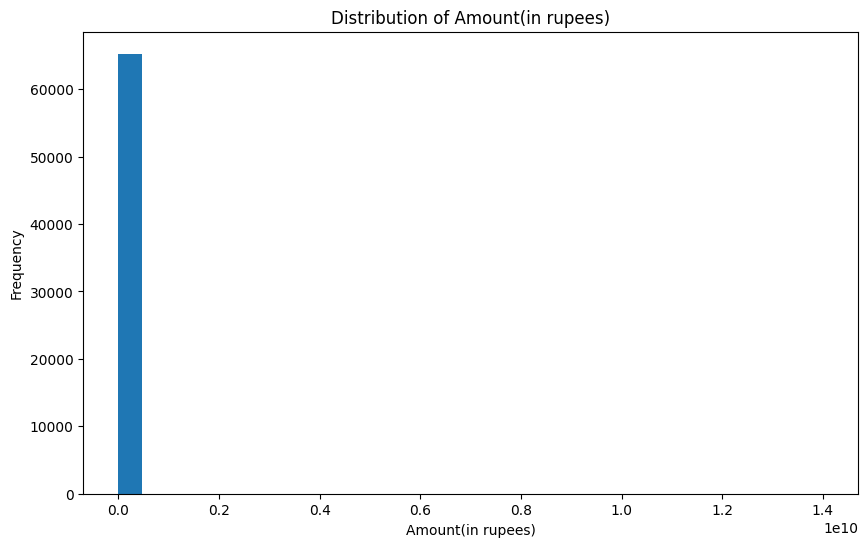

Summary statistics for column: Price (in rupees)
count    6.229800e+04
mean     6.806530e+03
std      4.454801e+04
min      0.000000e+00
25%      3.833000e+03
50%      5.067000e+03
75%      7.106750e+03
max      6.700000e+06
Name: Price (in rupees), dtype: float64


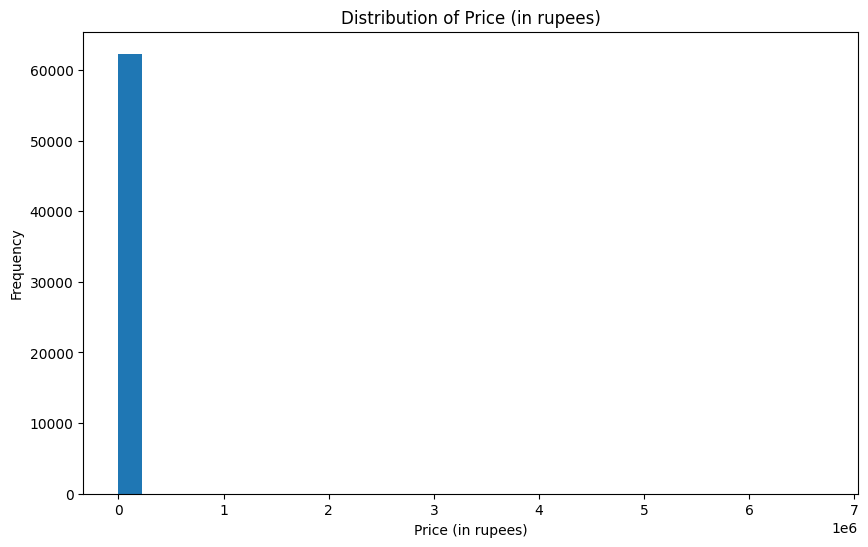

Summary statistics for column: Total Area
count    6.806800e+04
mean     2.304563e+04
std      4.888671e+06
min      1.000000e+00
25%      8.500000e+02
50%      1.150000e+03
75%      1.550000e+03
max      1.272096e+09
Name: Total Area, dtype: float64


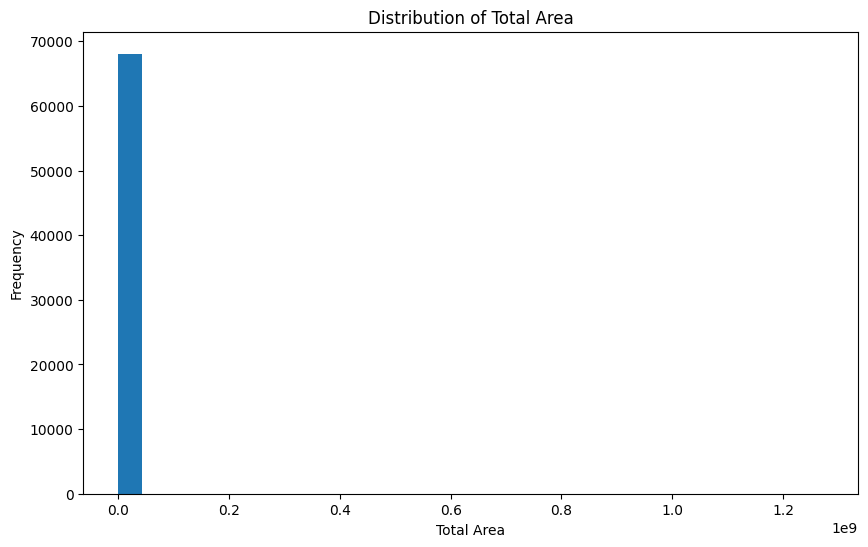

Summary statistics for column: Bathroom
count     67721.0
mean     2.411187
std      0.899991
min           1.0
25%           2.0
50%           2.0
75%           3.0
max          11.0
Name: Bathroom, dtype: Float64


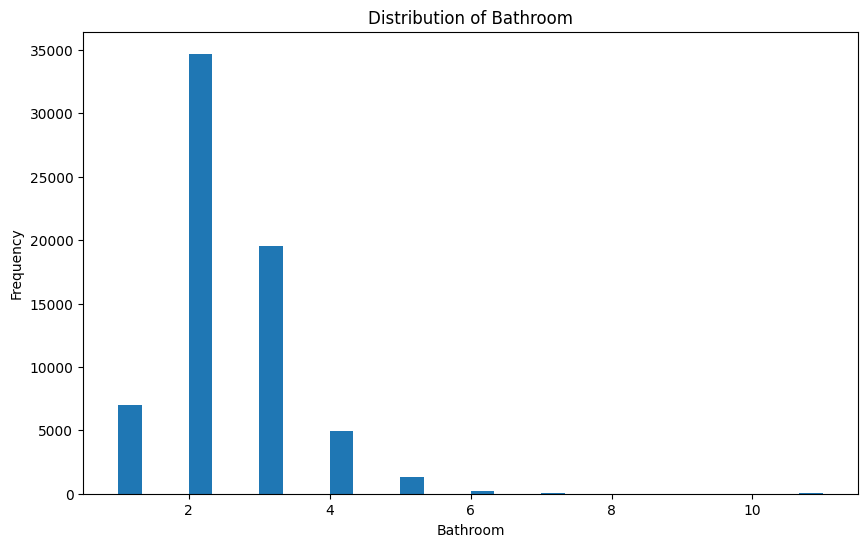

Summary statistics for column: Balcony
count     49133.0
mean     2.087049
std      1.019998
min           1.0
25%           1.0
50%           2.0
75%           3.0
max          11.0
Name: Balcony, dtype: Float64


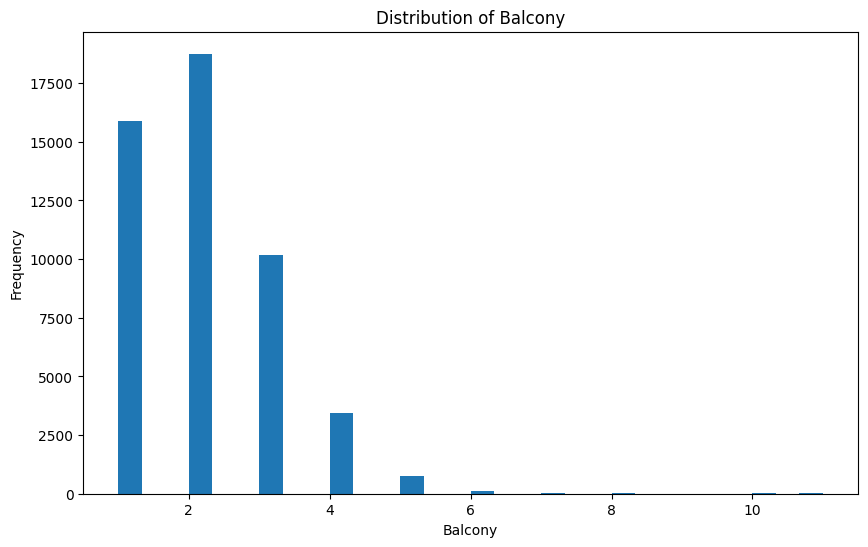

Summary statistics for column: maximum floor
count    65529.000000
mean         8.521281
std          6.964287
min          1.000000
25%          4.000000
50%          5.000000
75%         12.000000
max        200.000000
Name: maximum floor, dtype: float64


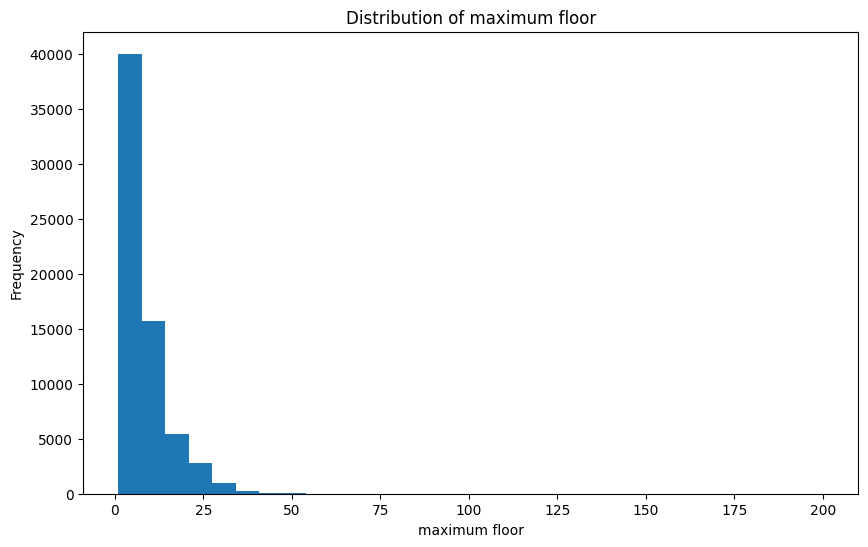

Summary statistics for column: current floor
count    65534.000000
mean         4.311289
std          4.441578
min         -2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        200.000000
Name: current floor, dtype: float64


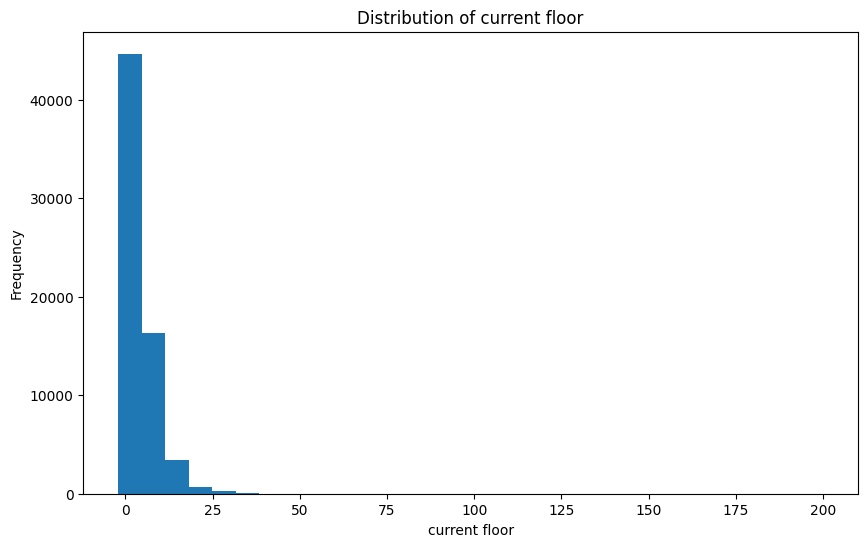


Value counts for column: Transaction
Transaction
Resale          50614
New Property    17438
NaN                78
Other              60
Rent/Lease          2
Name: count, dtype: int64


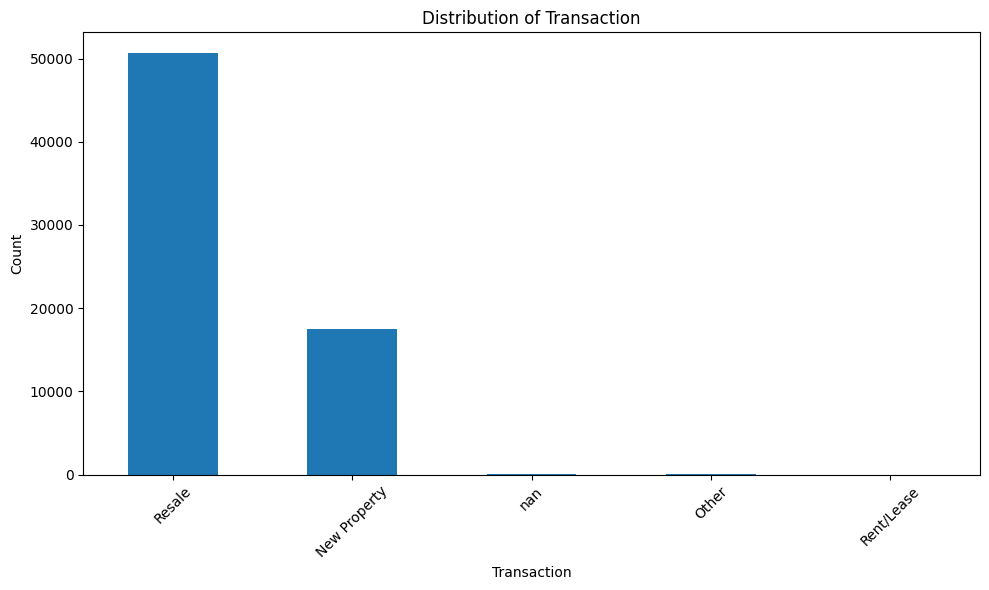


Value counts for column: Furnishing
Furnishing
Semi-Furnished    29248
Unfurnished       28537
Furnished          9117
NaN                1290
Name: count, dtype: int64


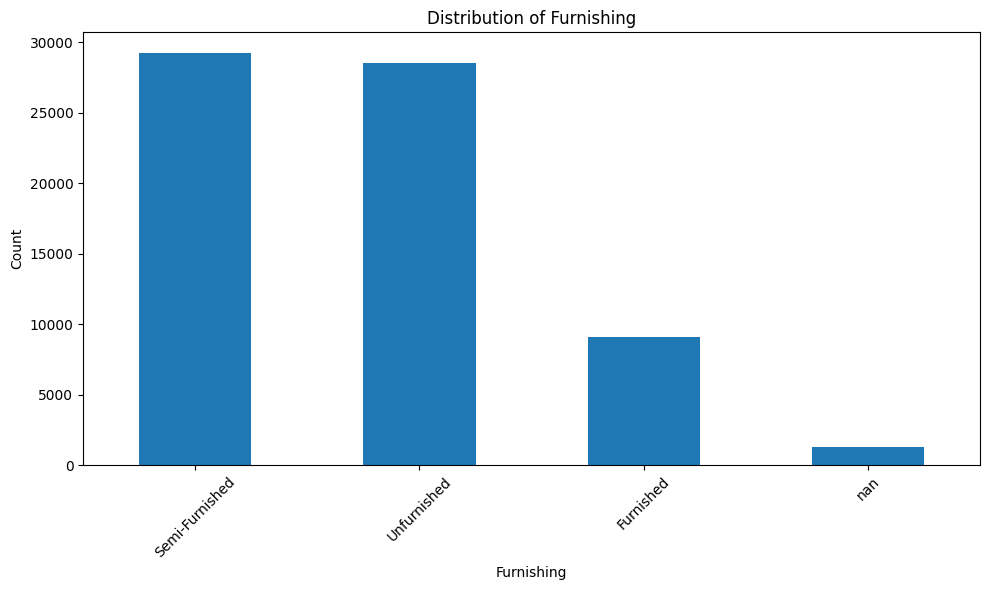


Value counts for column: facing
facing
NaN             26800
East            19000
North - East     8644
North            5642
West             3301
South            1689
South - East     1256
North - West     1189
South -West       671
Name: count, dtype: int64


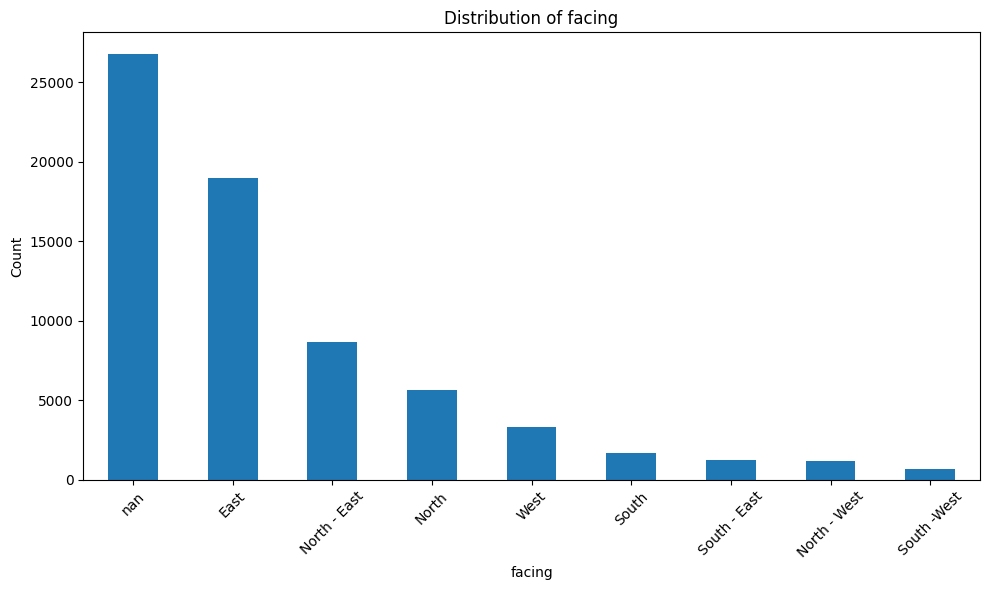


Value counts for column: overlooking
overlooking
NaN                             29535
Main Road                       12249
Garden,Park, Main Road           9226
Garden,Park                      8270
Garden,Park, Main Road, Pool     6593
Garden,Park, Pool                1750
Pool                              355
Main Road, Pool                   214
Name: count, dtype: int64


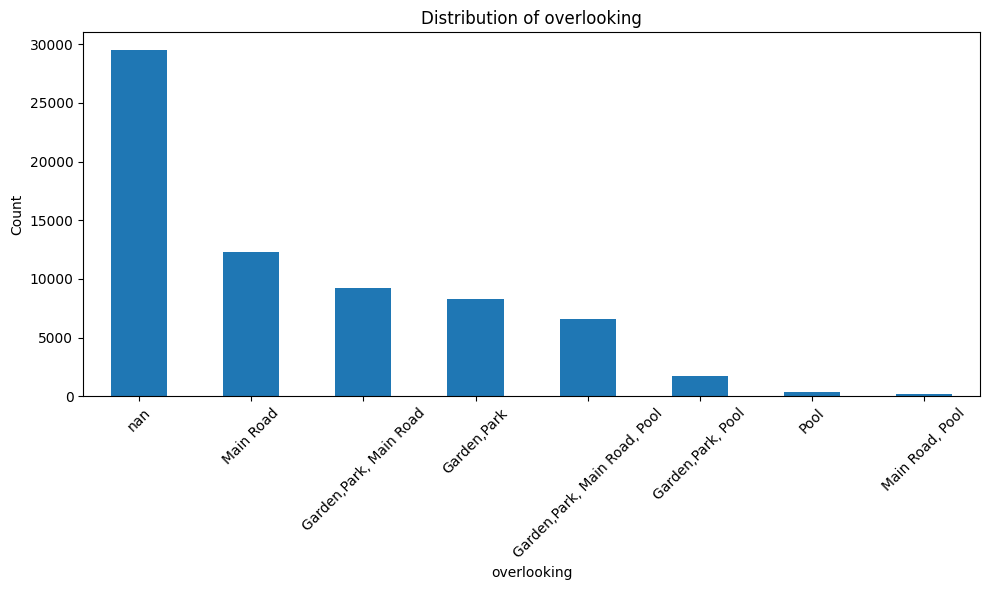


Value counts for column: Ownership
Ownership
Freehold                37341
NaN                     24928
Leasehold                3070
Co-operative Society     2370
Power Of Attorney         483
Name: count, dtype: int64


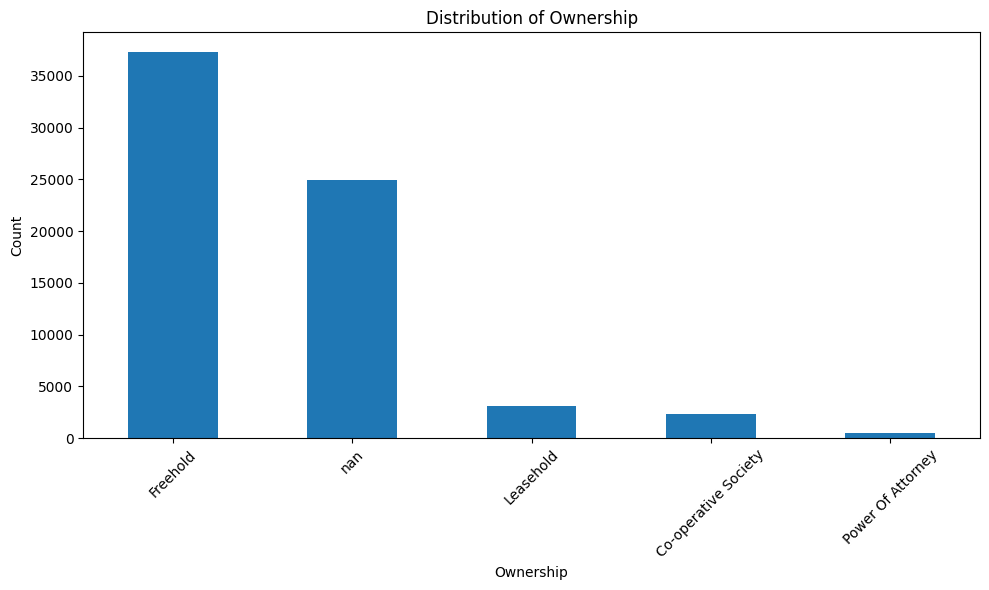


Value counts for column: location
location
faridabad        3000
greater-noida    3000
chennai          2999
new-delhi        2998
gurgaon          2998
                 ... 
nellore            30
pondicherry        30
navsari            30
palakkad           30
solapur            30
Name: count, Length: 81, dtype: int64


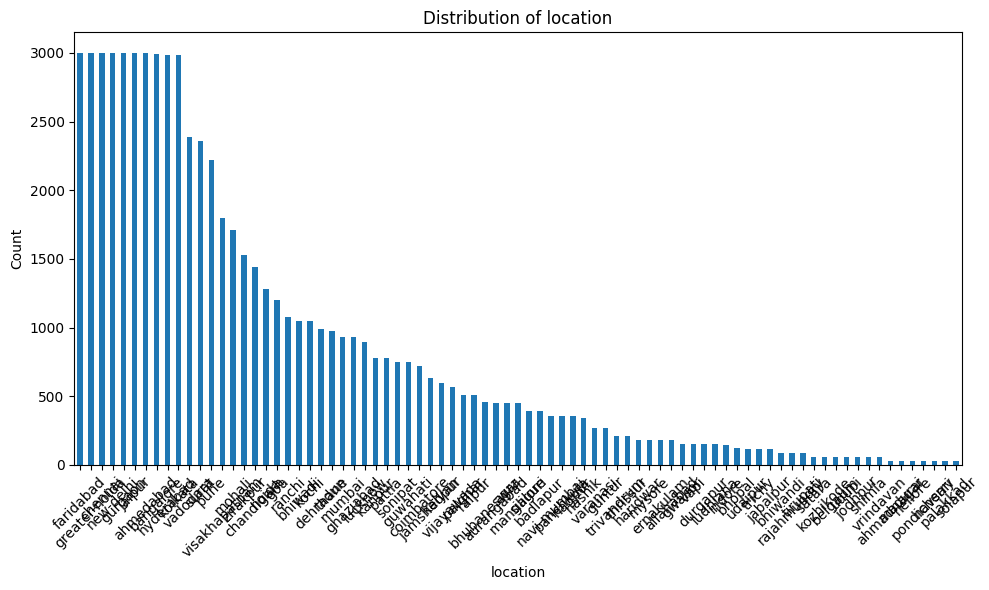

In [46]:
# @title Graphs Frequency

df=df_scaled.copy()

# Univariate analysis - Numeric
numeric_columns = ['Amount(in rupees)', 'Price (in rupees)', 'Total Area', 'Bathroom', 'Balcony','maximum floor','current floor']
for column in numeric_columns:
    print("Summary statistics for column:", column)
    print(df[column].describe())
    plt.figure(figsize=(10, 6))
    plt.hist(df[column].dropna(), bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Univariate analysis - Categorical
categorical_columns = ['Transaction', 'Furnishing', 'facing', 'overlooking', 'Ownership', 'location']
for column in categorical_columns:
    print(f"\nValue counts for column: {column}")
    print(df[column].value_counts(dropna=False))
    plt.figure(figsize=(10, 6))
    df[column].value_counts(dropna=False).plot(kind='bar')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


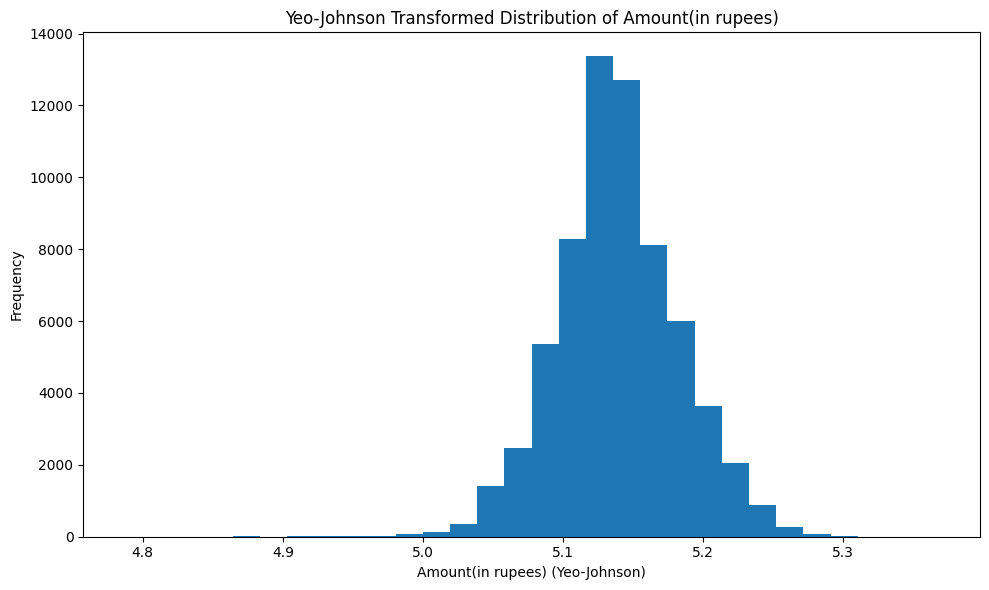

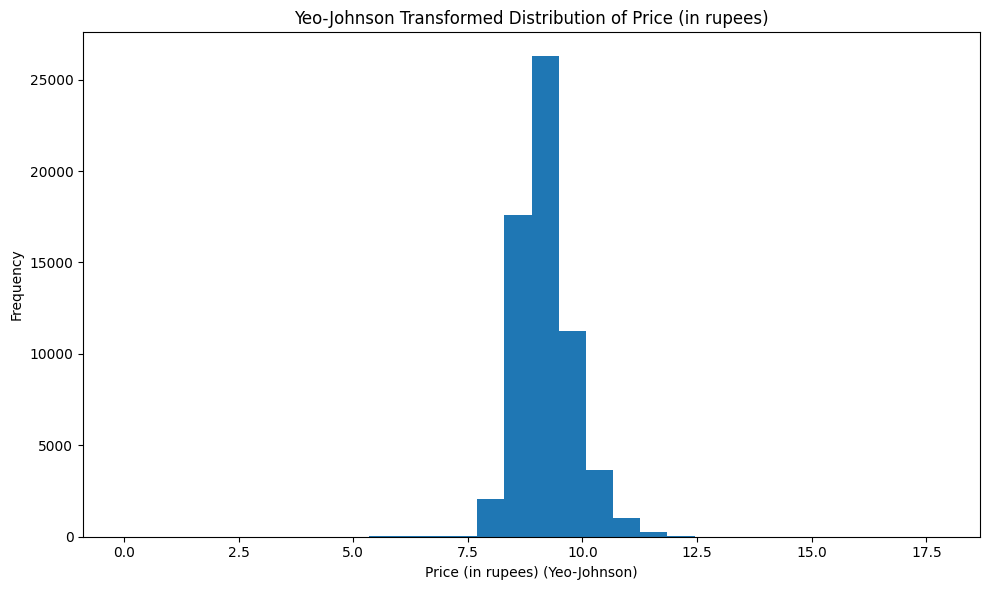

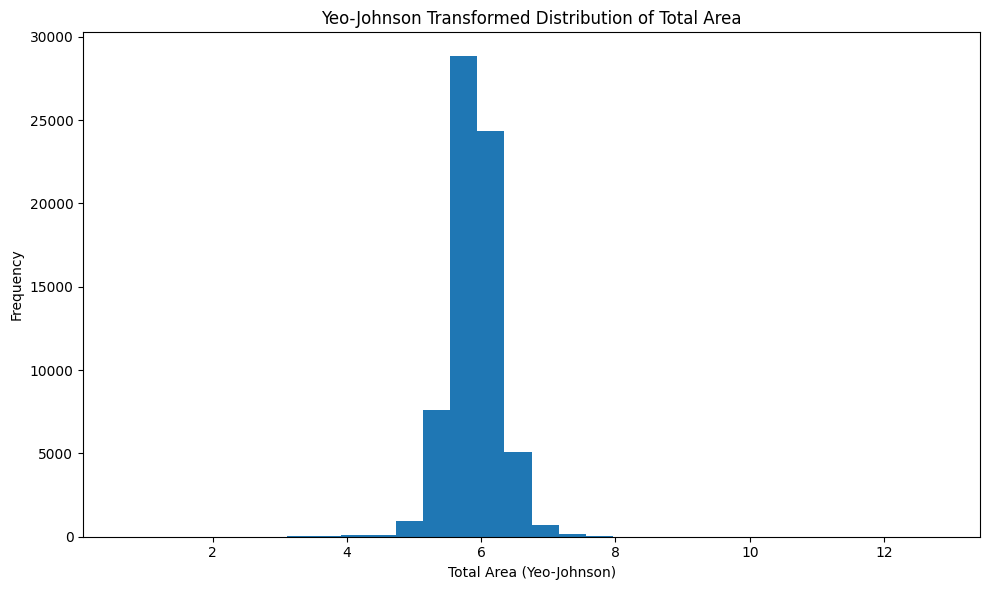

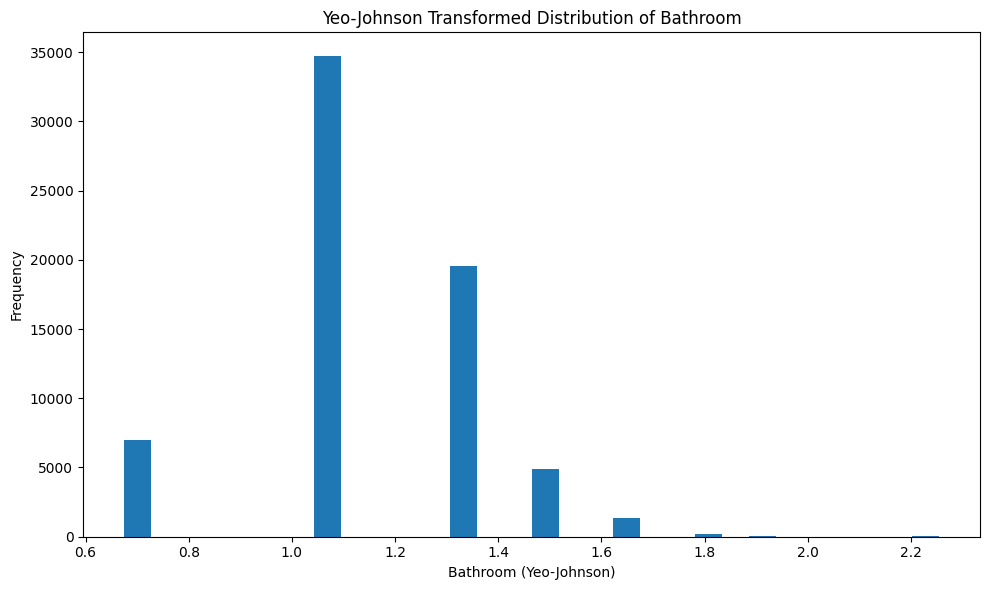

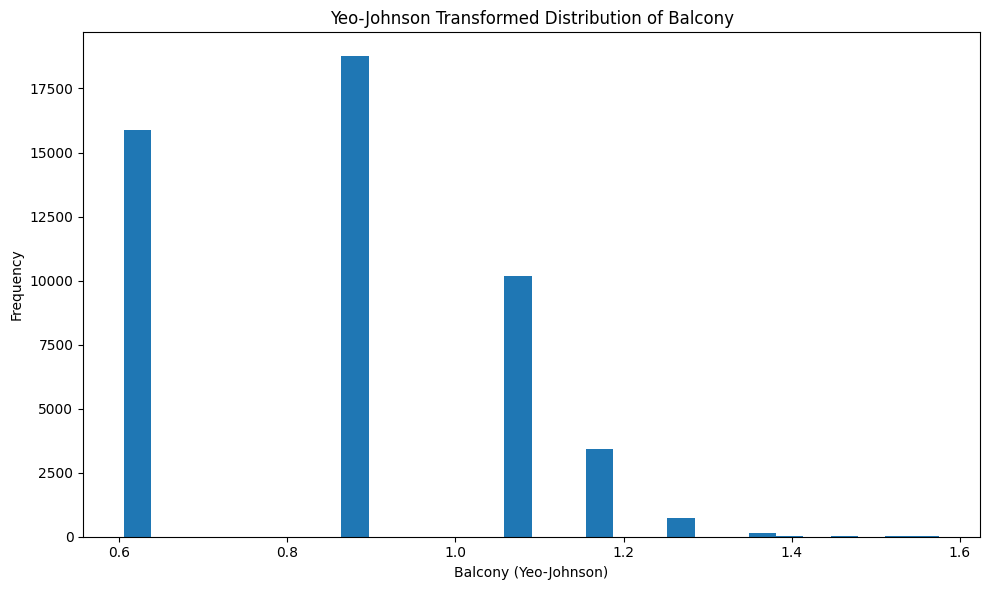

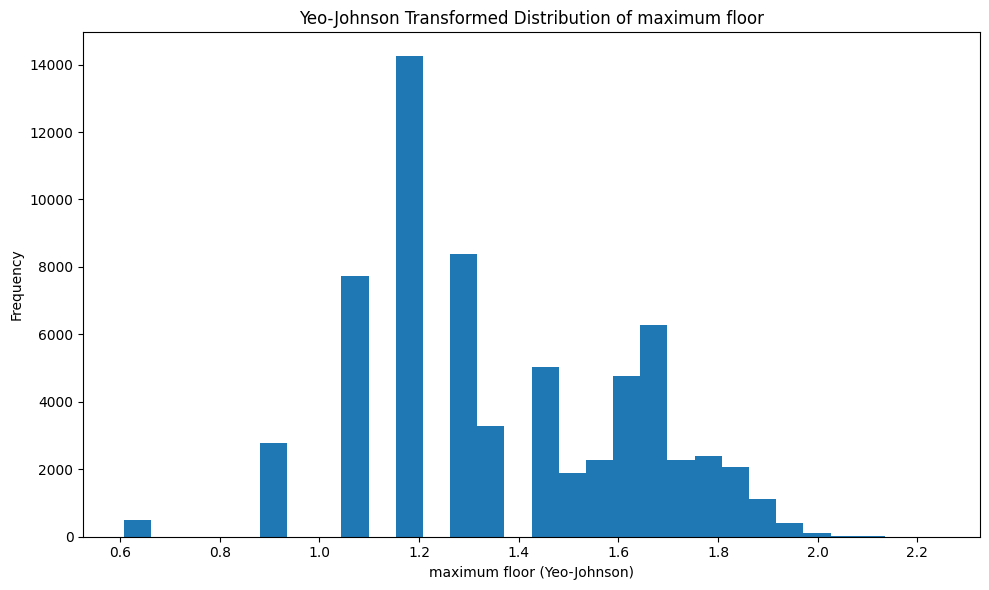

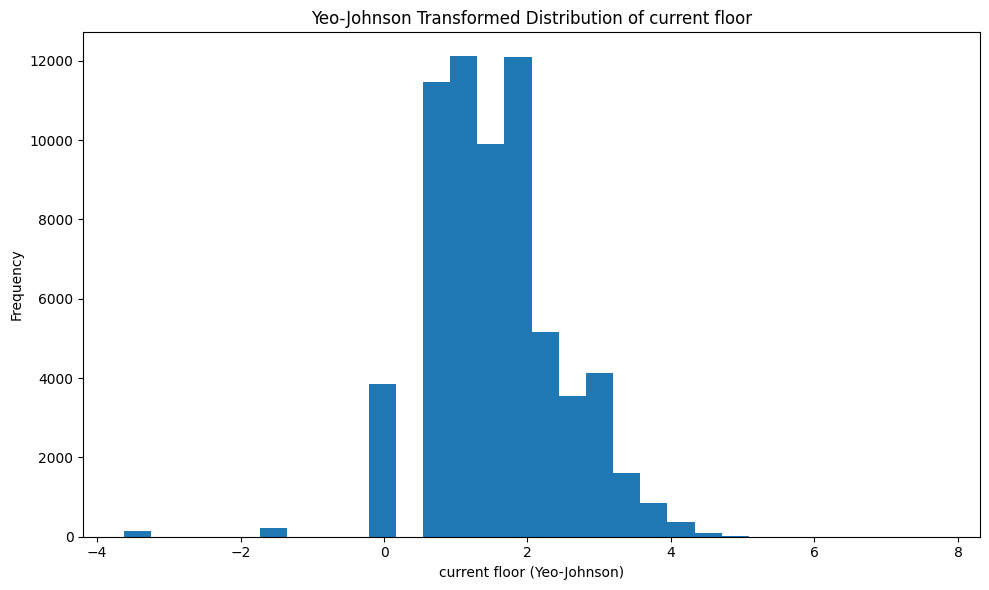

In [47]:
# @title Graph Frequency unskewing with Yeo Johnson

# Numeric columns για unskewing
numeric_columns = ['Amount(in rupees)', 'Price (in rupees)', 'Total Area',
                   'Bathroom', 'Balcony', 'maximum floor', 'current floor']

# Ο transformer για Yeo-Johnson
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

for column in numeric_columns:
    plt.figure(figsize=(10, 6))

    # Παίρνουμε τα δεδομένα, αγνοώντας NaN
    data = df[column].dropna().values.reshape(-1, 1)

    # Εφαρμογή Yeo-Johnson μετασχηματισμού
    transformed = transformer.fit_transform(data).flatten()

    # Plot του μετασχηματισμένου
    plt.hist(transformed, bins=30)
    plt.title(f"Yeo-Johnson Transformed Distribution of {column}")
    plt.xlabel(f"{column} (Yeo-Johnson)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


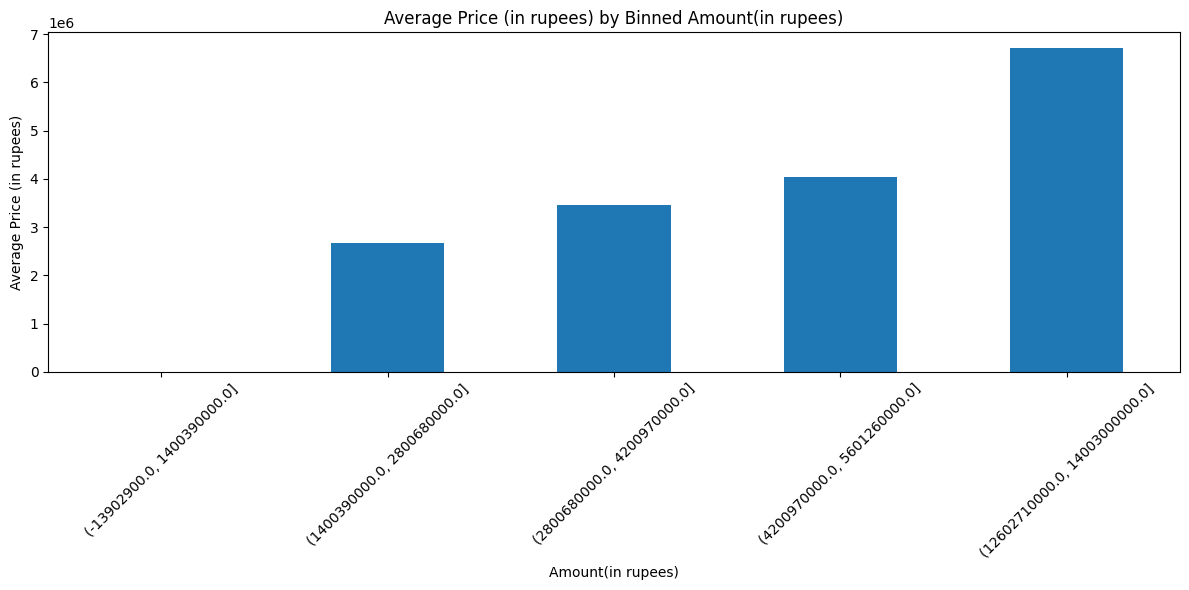

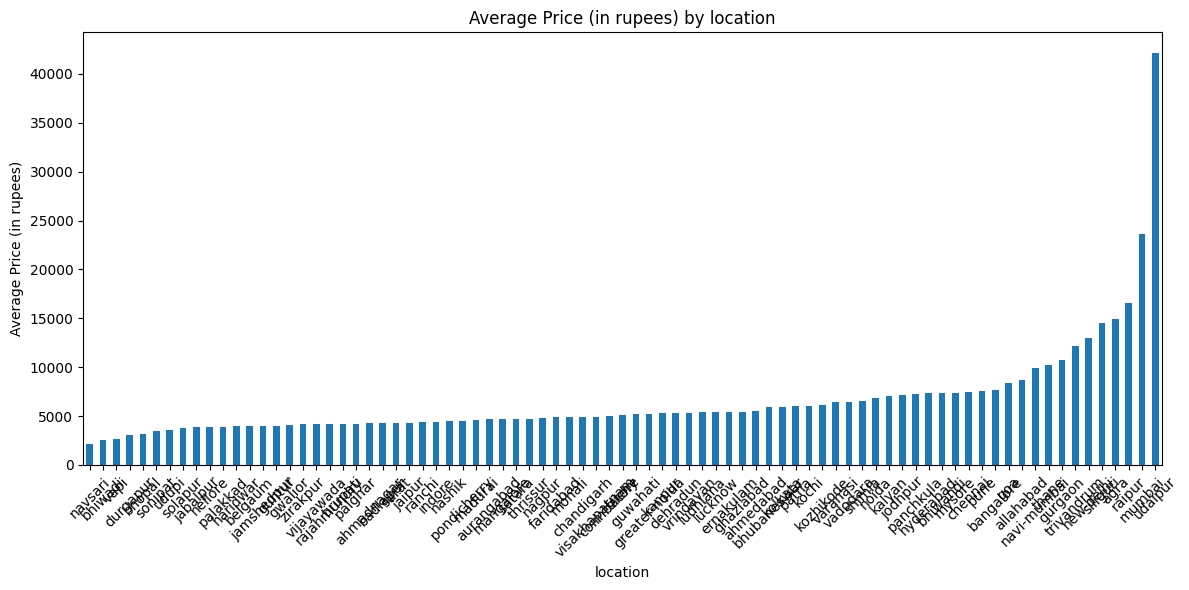

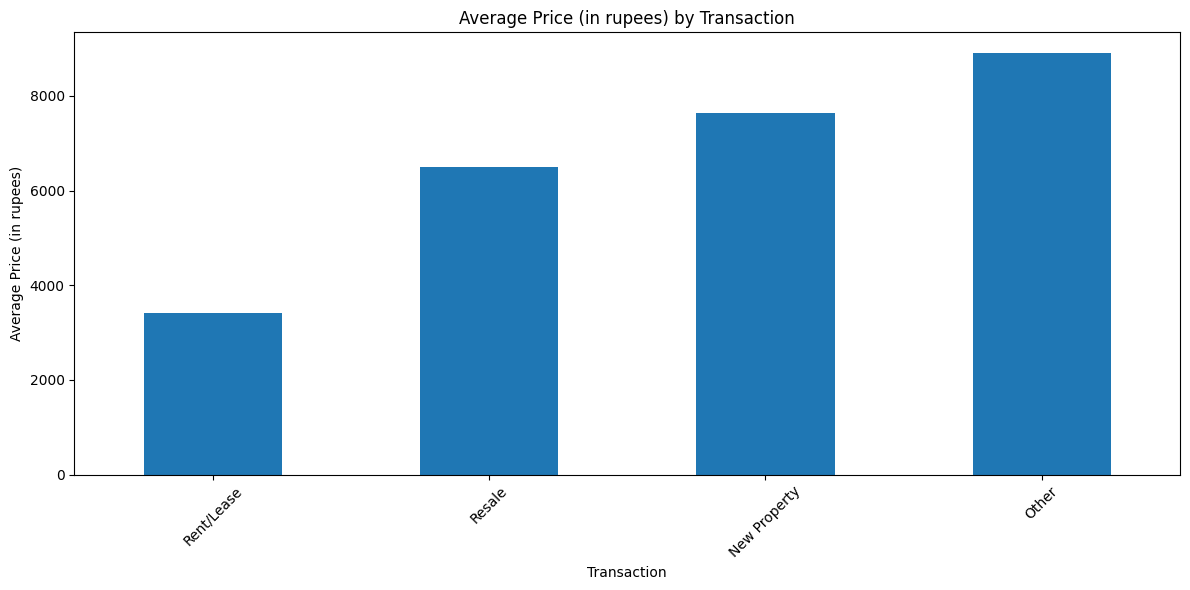

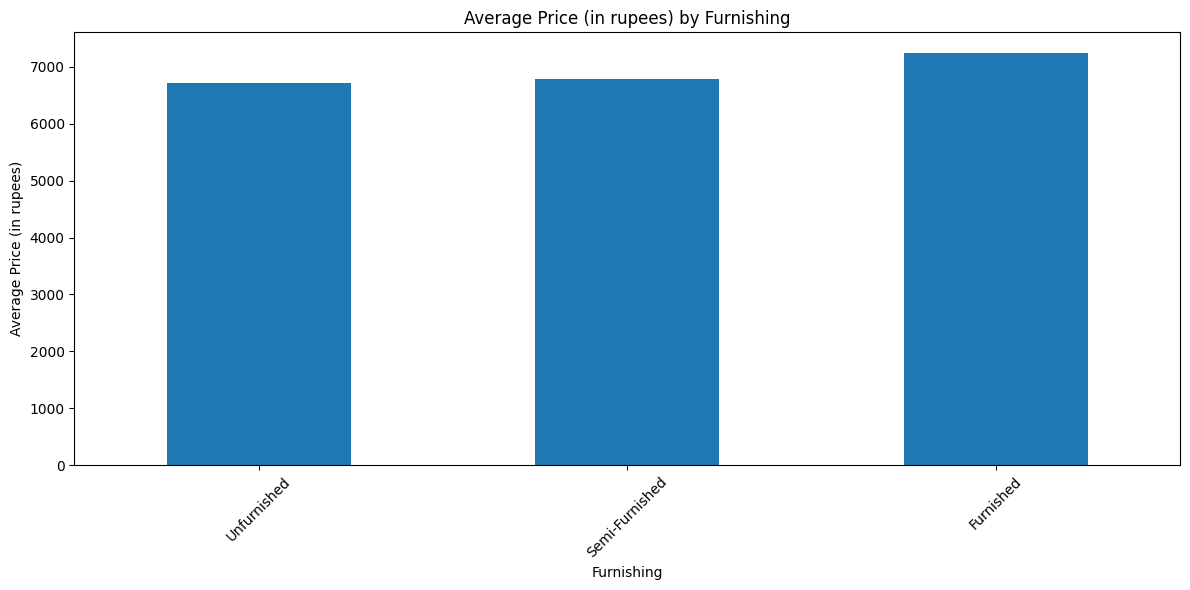

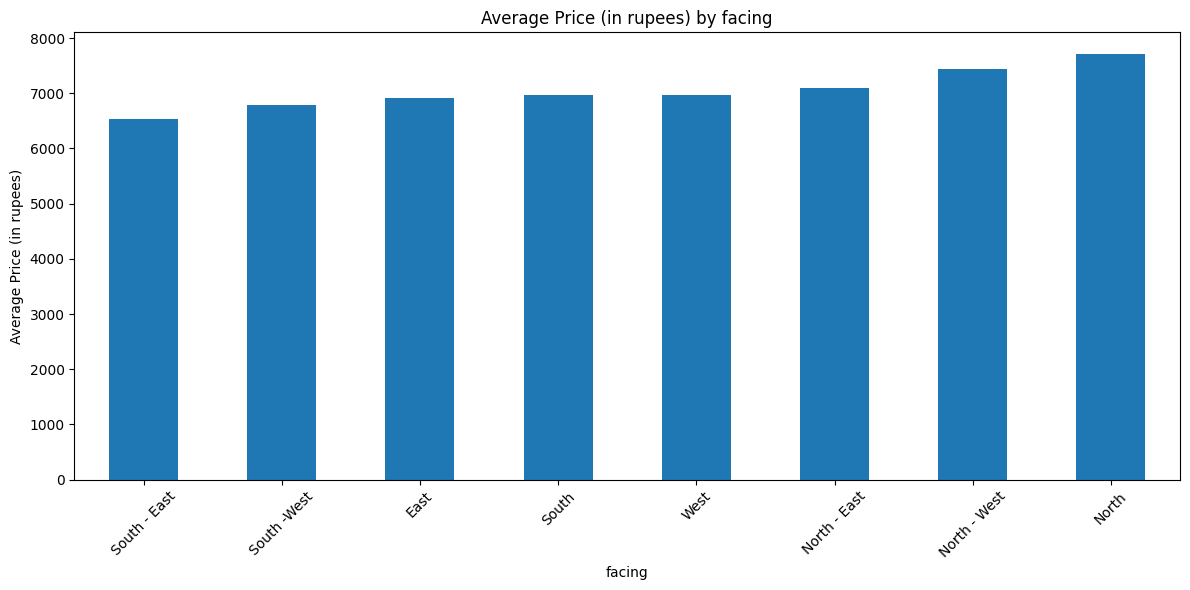

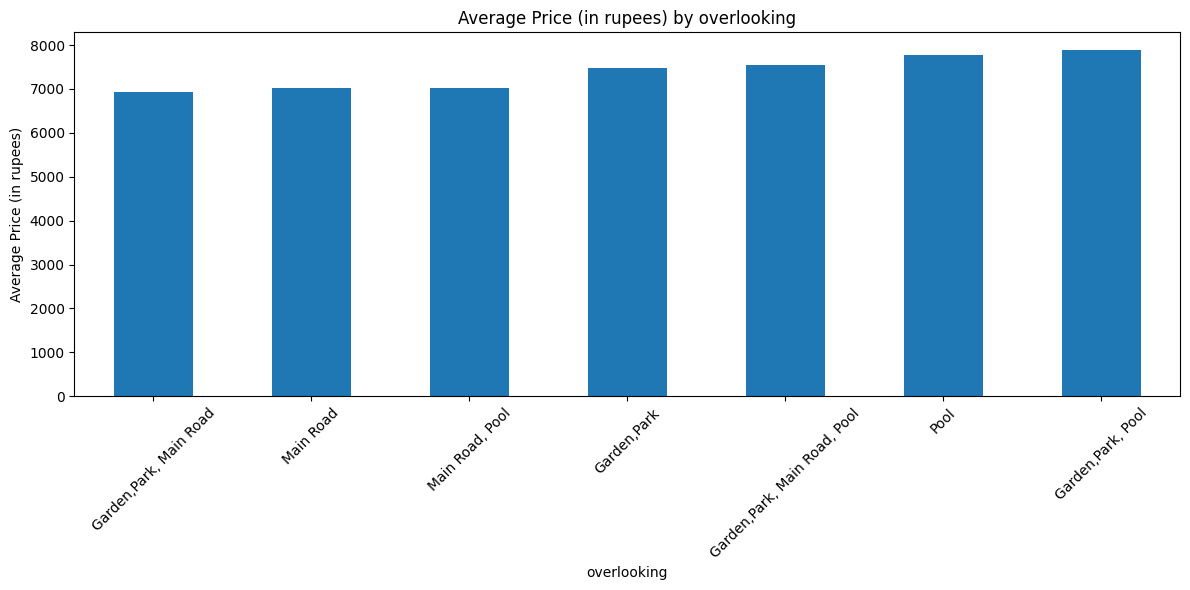

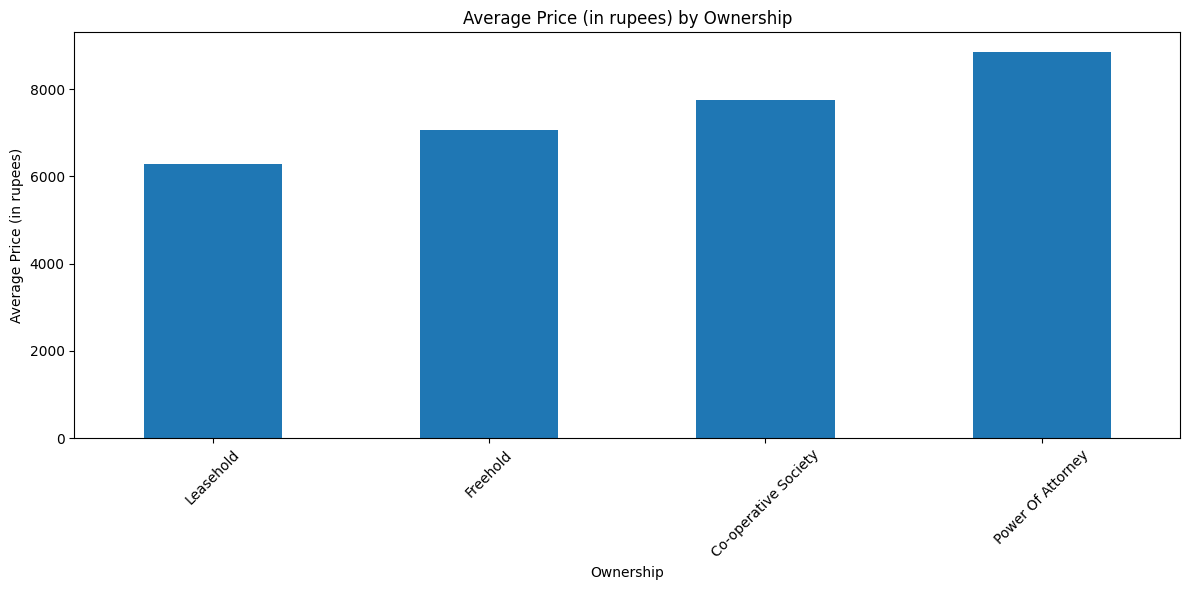

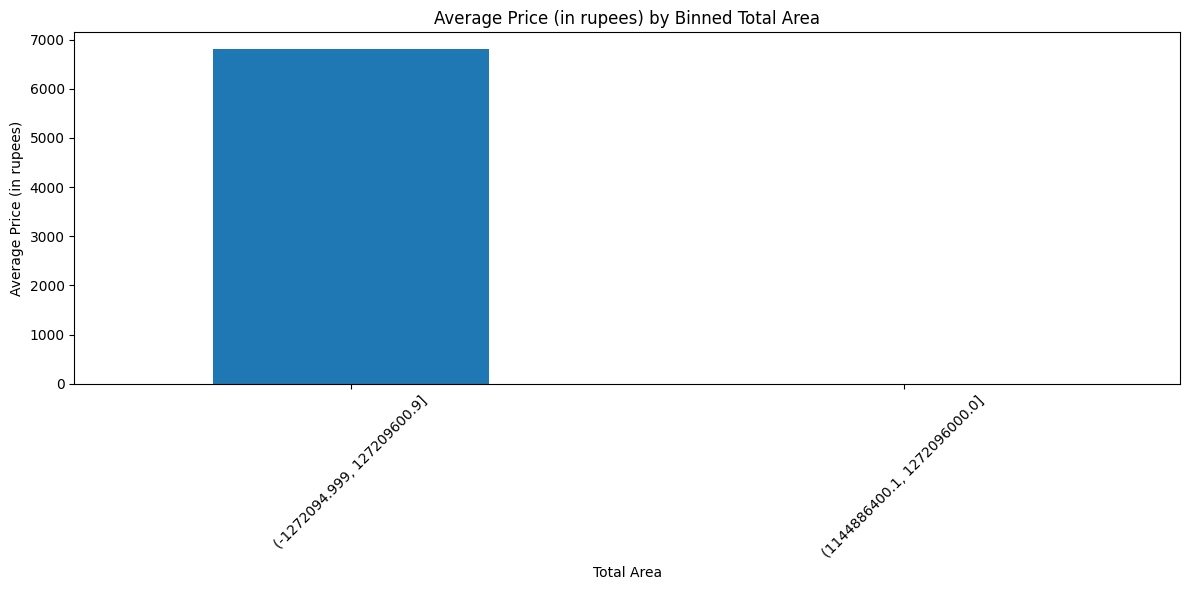

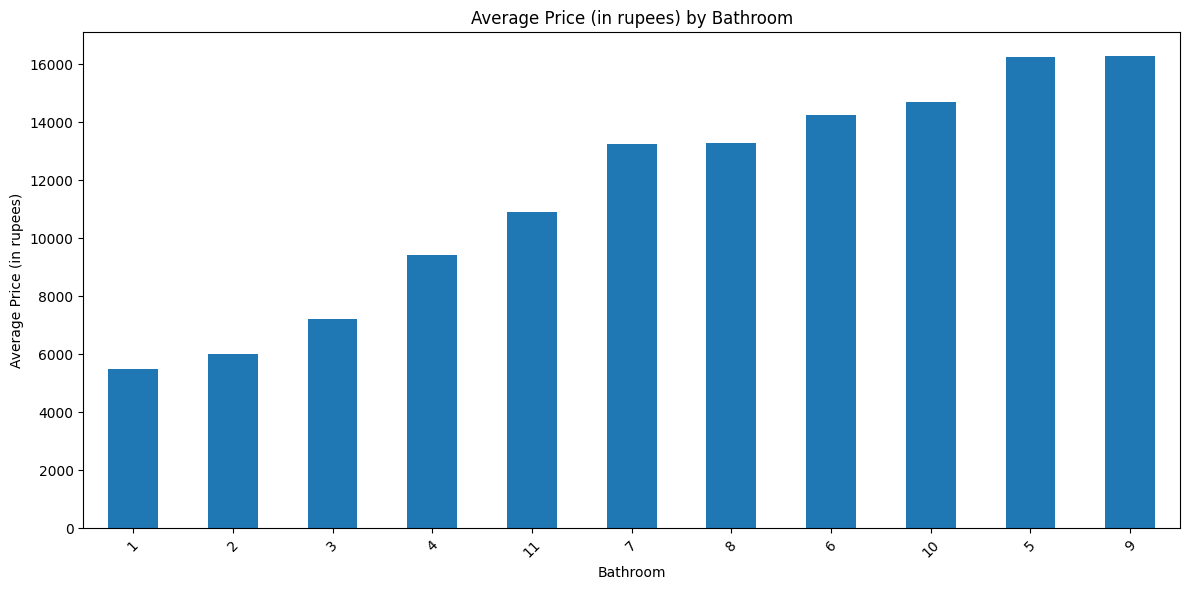

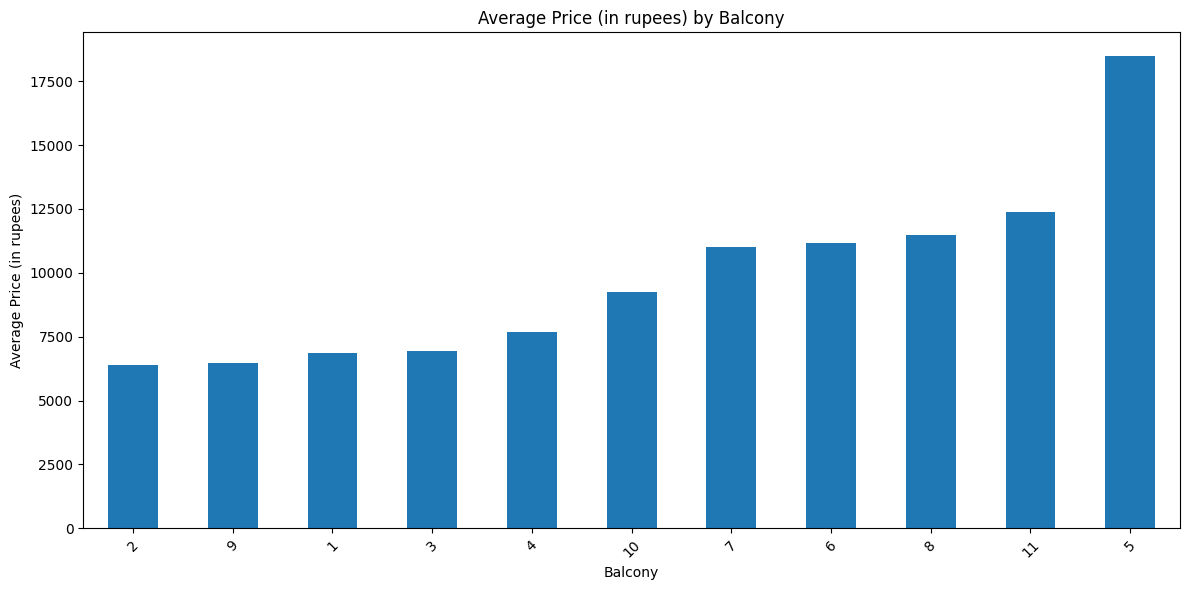

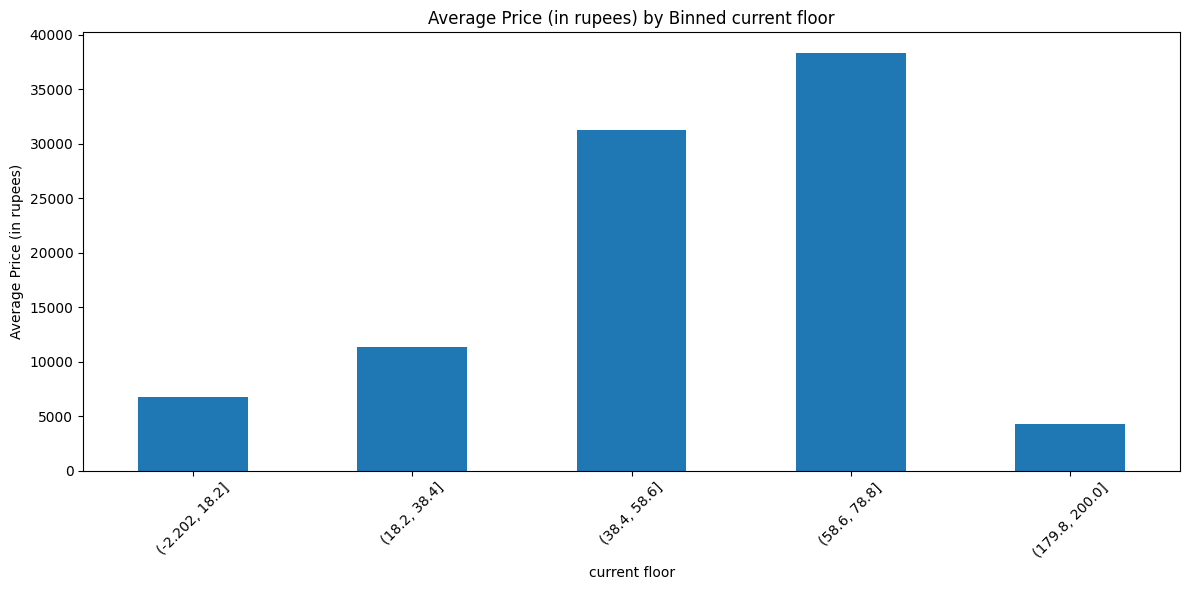

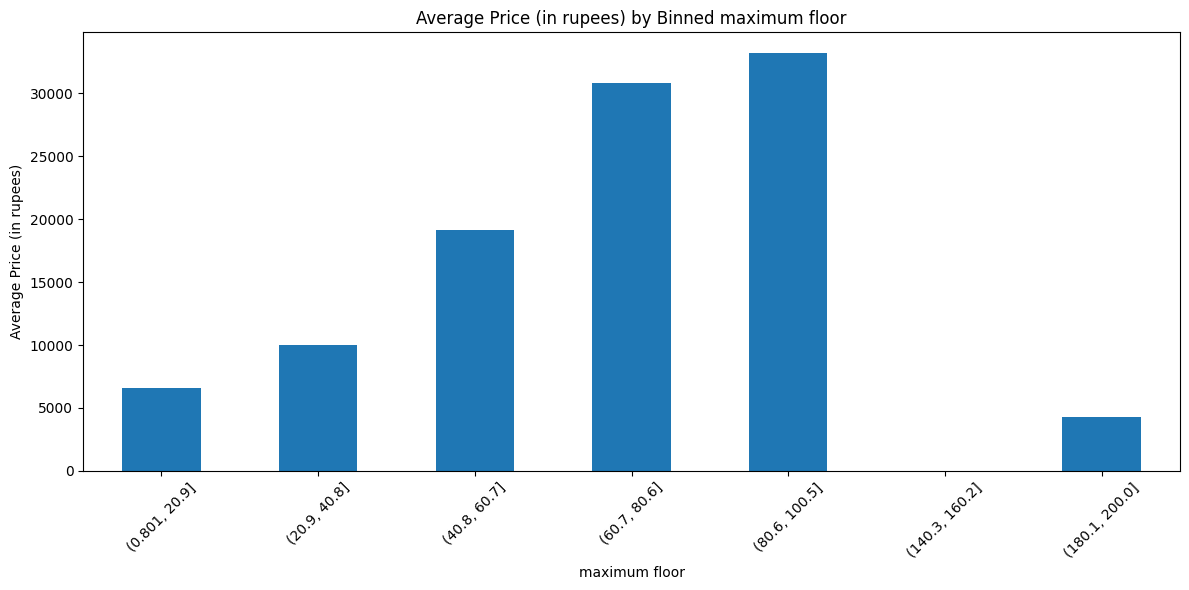

In [48]:
# @title GRAPHS Average Price with FEATURES
# ===== Plotting =====
target_column = 'Price (in rupees)'
features = ['Amount(in rupees)', 'location', 'Transaction', 'Furnishing',
            'facing', 'overlooking', 'Ownership', 'Total Area',
            'Bathroom', 'Balcony', 'current floor','maximum floor']

for column in features:
    plt.figure(figsize=(12, 6))

    if df[column].dtype == 'object' or df[column].nunique() < 20:
        mean_price = df.groupby(column)[target_column].mean().sort_values()

        mean_price.plot(kind='bar')
        plt.title(f"Average {target_column} by {column}")
        plt.ylabel(f"Average {target_column}")
        plt.xlabel(column)
        plt.xticks(rotation=45)

    else:
        # Για αριθμητικά: κάνε binning
        binned = pd.cut(df[column], bins=10)
        #mean_price = df.groupby(binned)[target_column].mean() warning
        mean_price = df.groupby(binned, observed=True)[target_column].mean() # without warning
        mean_price.plot(kind='bar')
        plt.title(f"Average {target_column} by Binned {column}")
        plt.ylabel(f"Average {target_column}")
        plt.xlabel(column)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


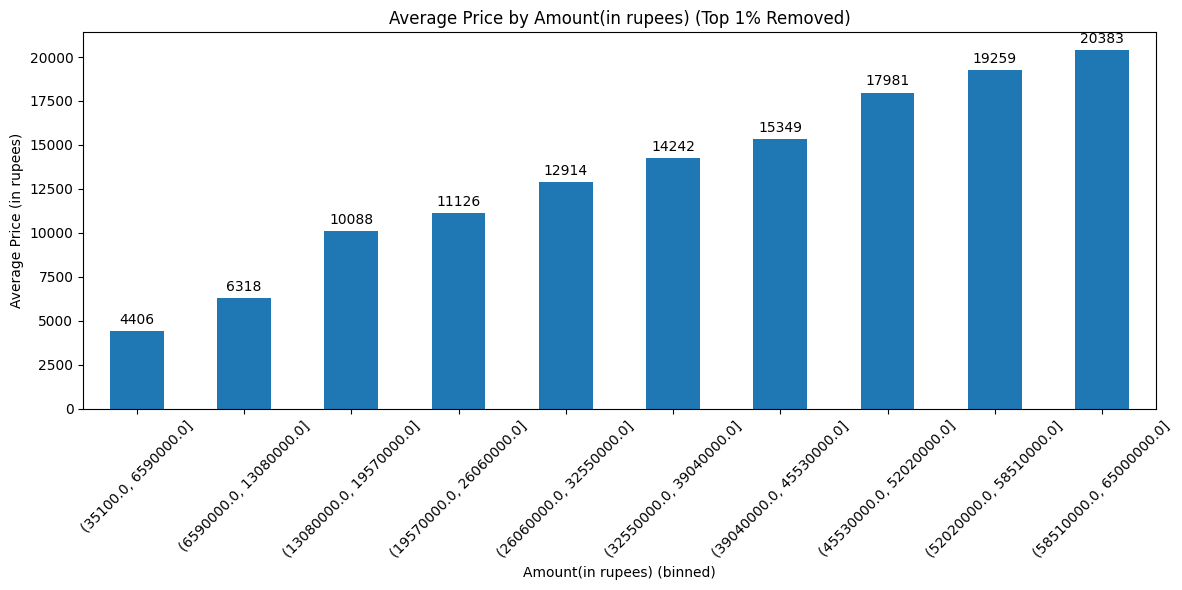

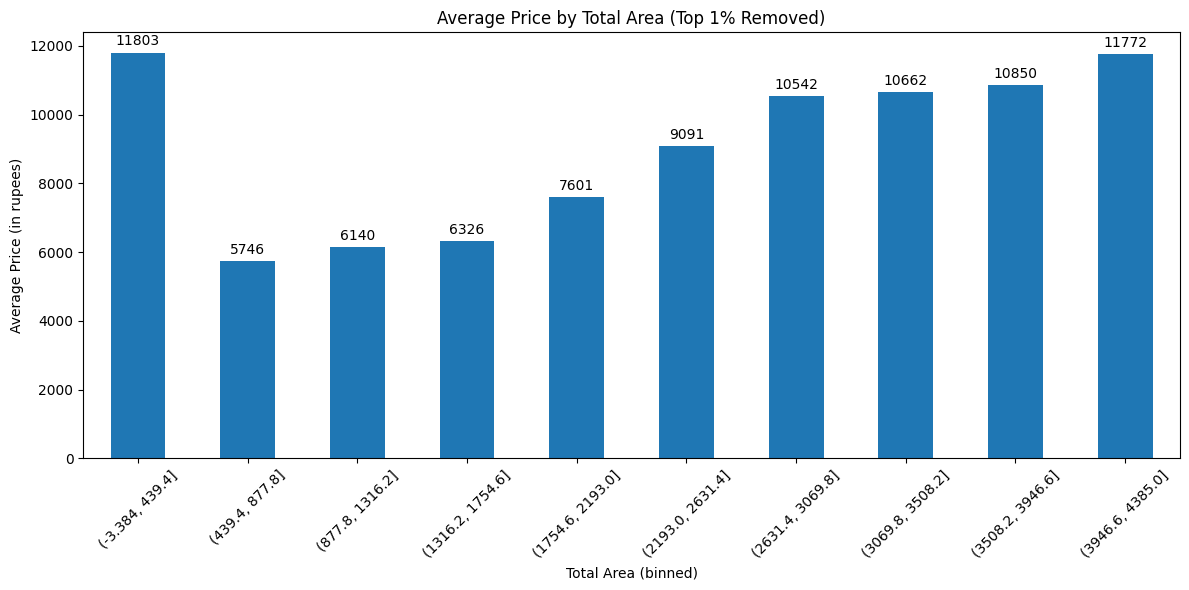

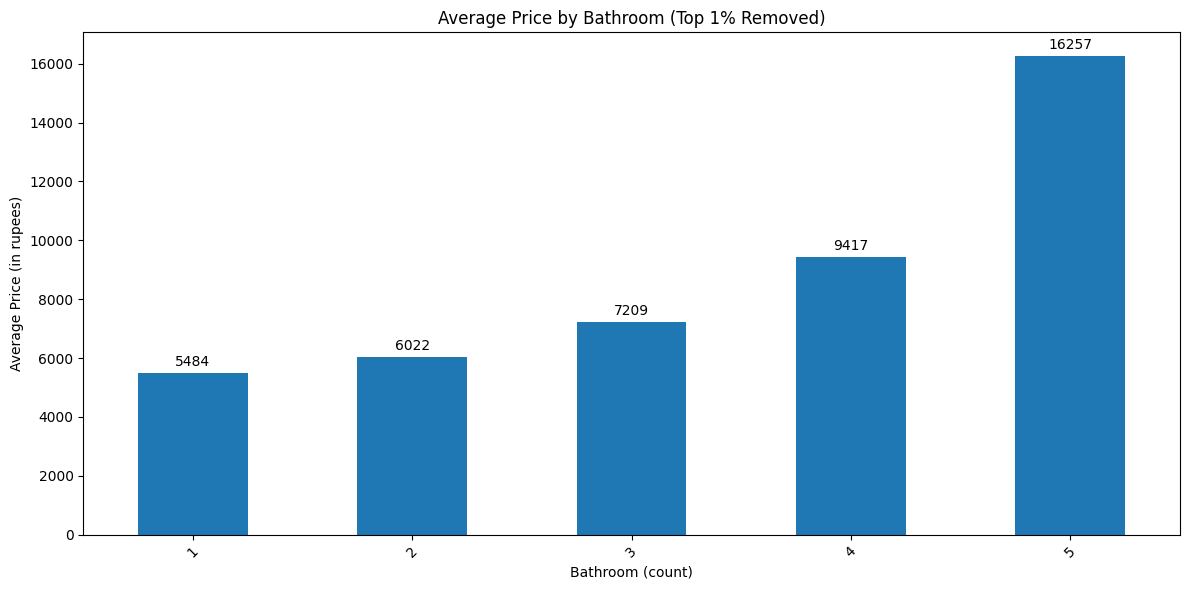

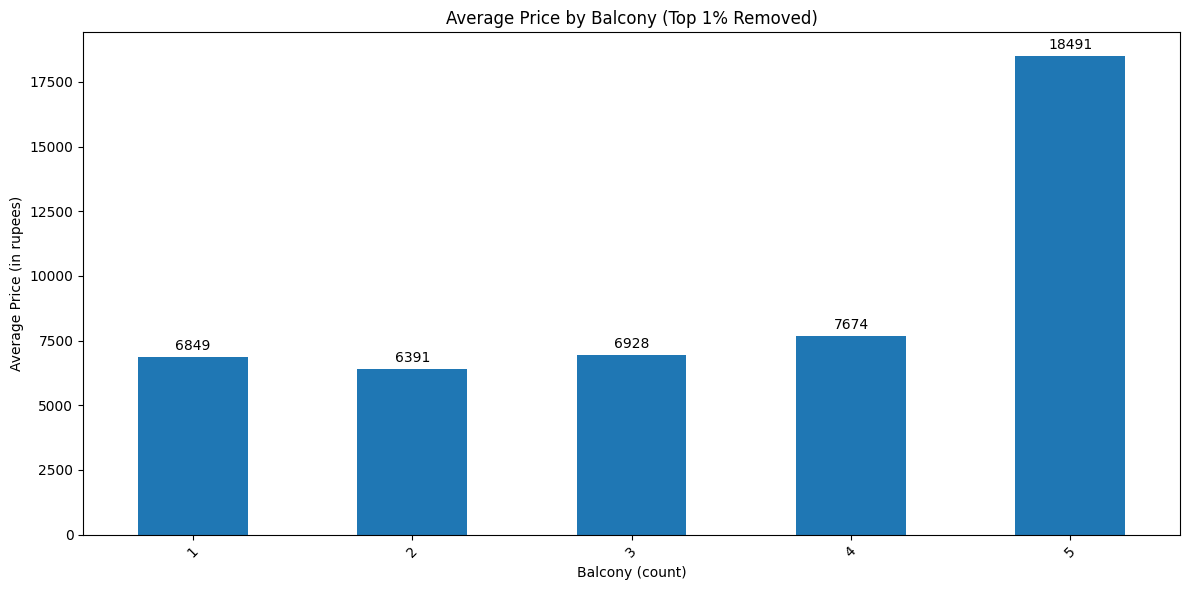

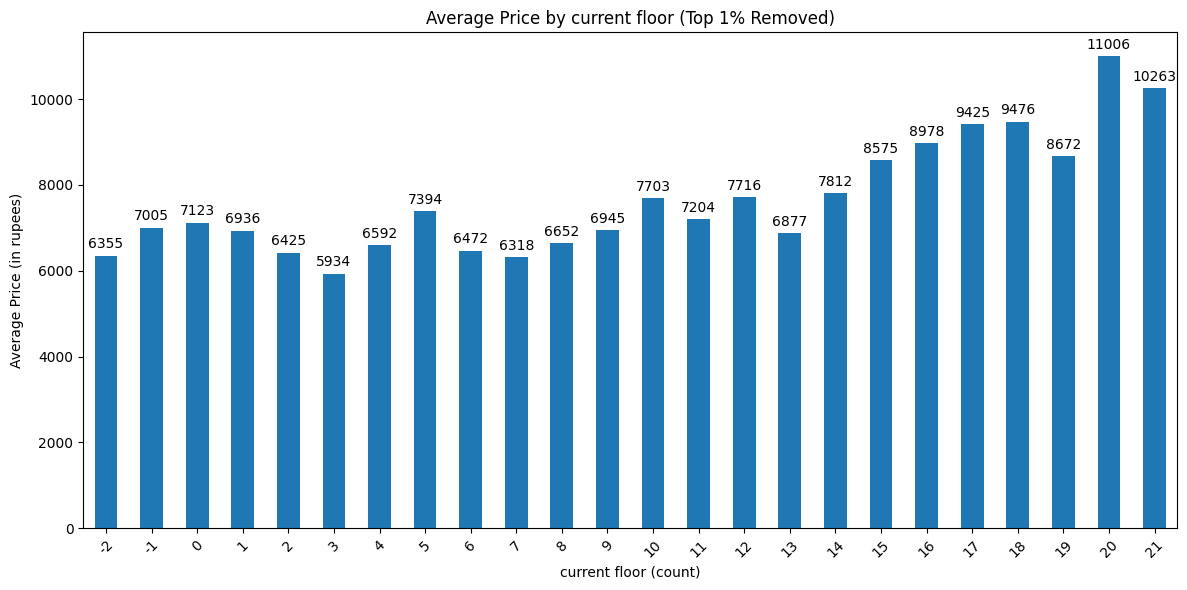

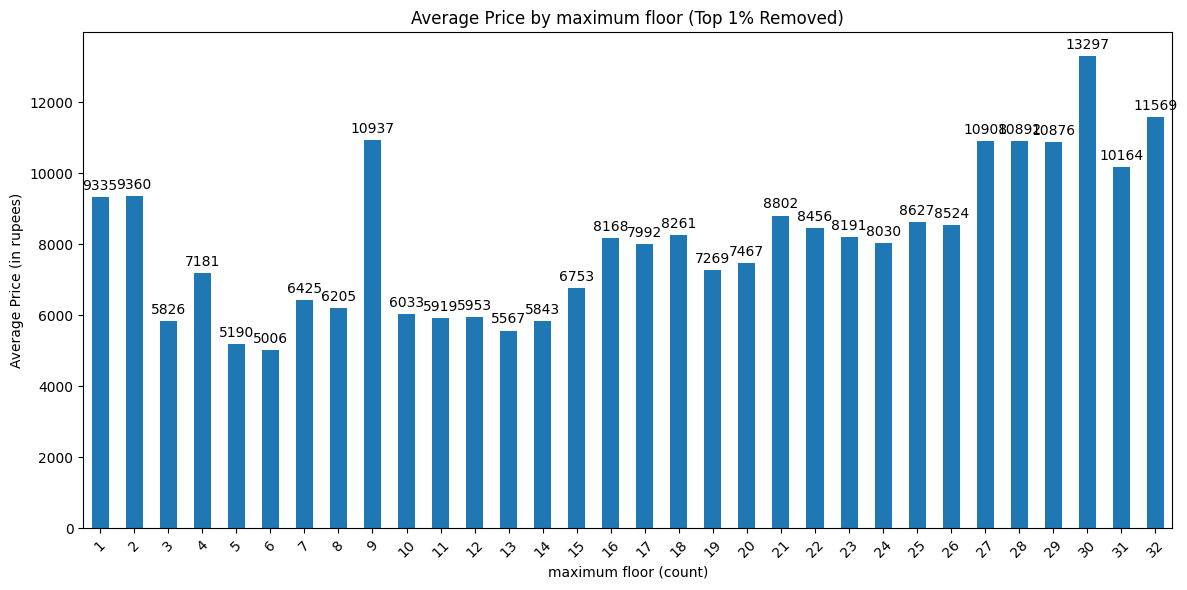

In [49]:
# @title GRAPHS Average Price with FEATURES without TOP 1%

target_column = 'Price (in rupees)'
features = ['Amount(in rupees)', 'Total Area', 'Bathroom', 'Balcony', 'current floor','maximum floor']

# Features to group by as integers directly
integer_bucket_features = ['Bathroom', 'Balcony', 'current floor','maximum floor']

for column in features:
    plt.figure(figsize=(12, 6))

    # Drop missing values and remove top 1% outliers
    filtered = df[[column, target_column]].dropna()
    threshold = filtered[column].quantile(0.99)
    filtered = filtered[filtered[column] <= threshold]

    if column in integer_bucket_features:
        # Round or convert to int, then group
        filtered[column] = filtered[column].astype(int)
        mean_price = filtered.groupby(column)[target_column].mean().sort_index()
        x_label = f"{column} (count)"
    else:
        # Bin into 10 equal-width bins for continuous features
        binned = pd.cut(filtered[column], bins=10)
        #mean_price = filtered.groupby(binned)[target_column].mean().sort_index() warning
        mean_price = filtered.groupby(binned, observed=True)[target_column].mean().sort_index() #without warnings
        x_label = f"{column} (binned)"

    # Plot and add labels
    ax = mean_price.plot(kind='bar')
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=3)

    plt.title(f"Average Price by {column} (Top 1% Removed)")
    plt.xlabel(x_label)
    plt.ylabel("Average Price (in rupees)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

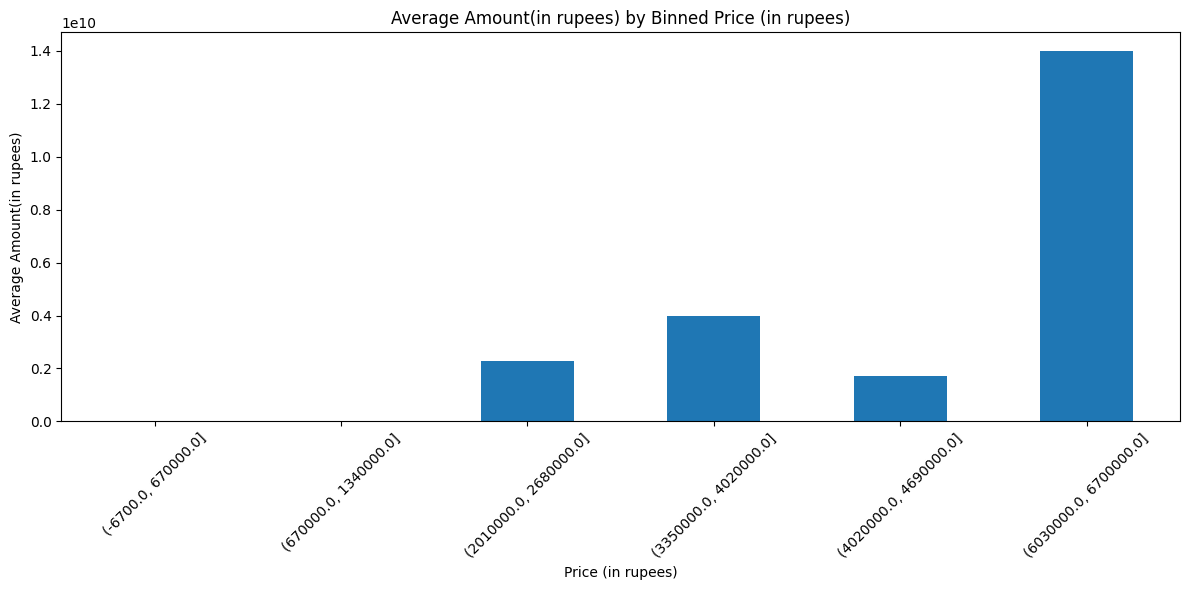

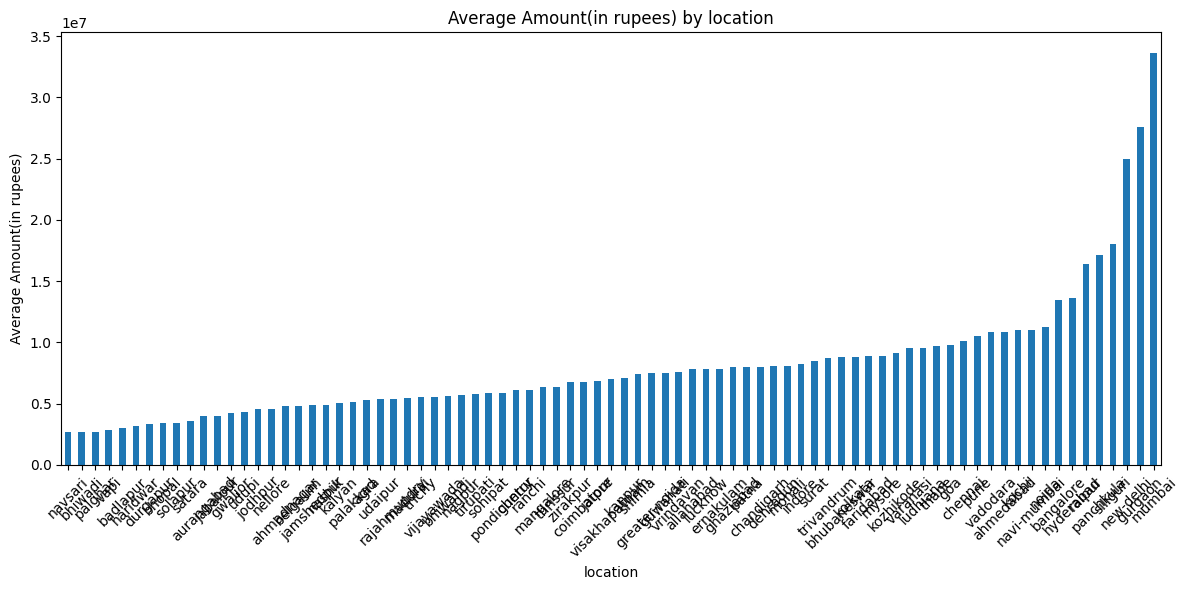

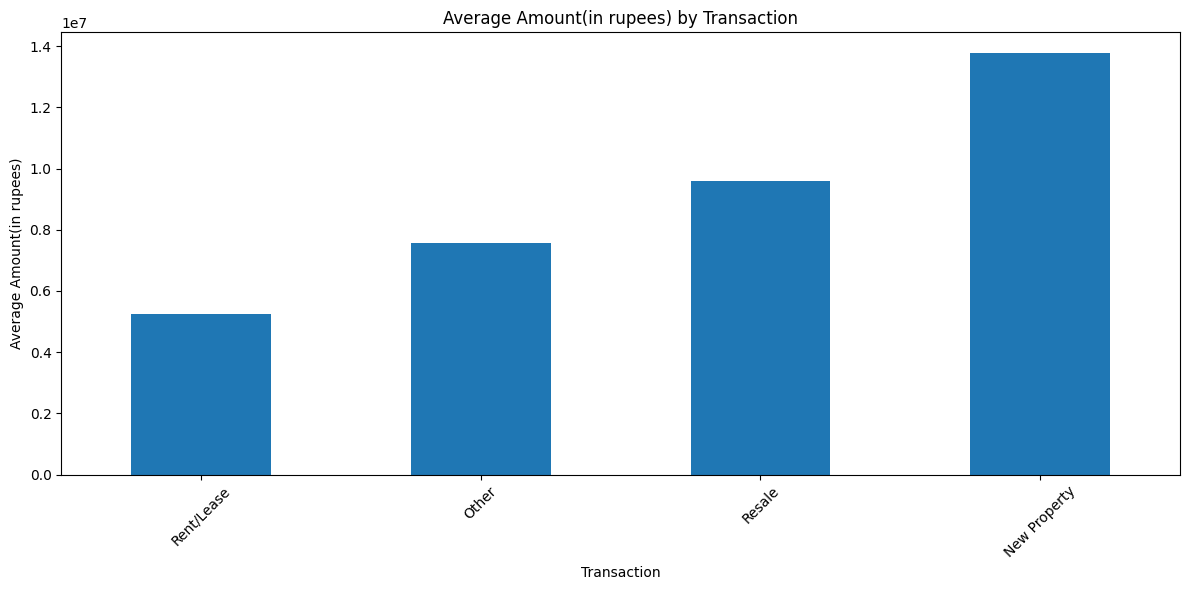

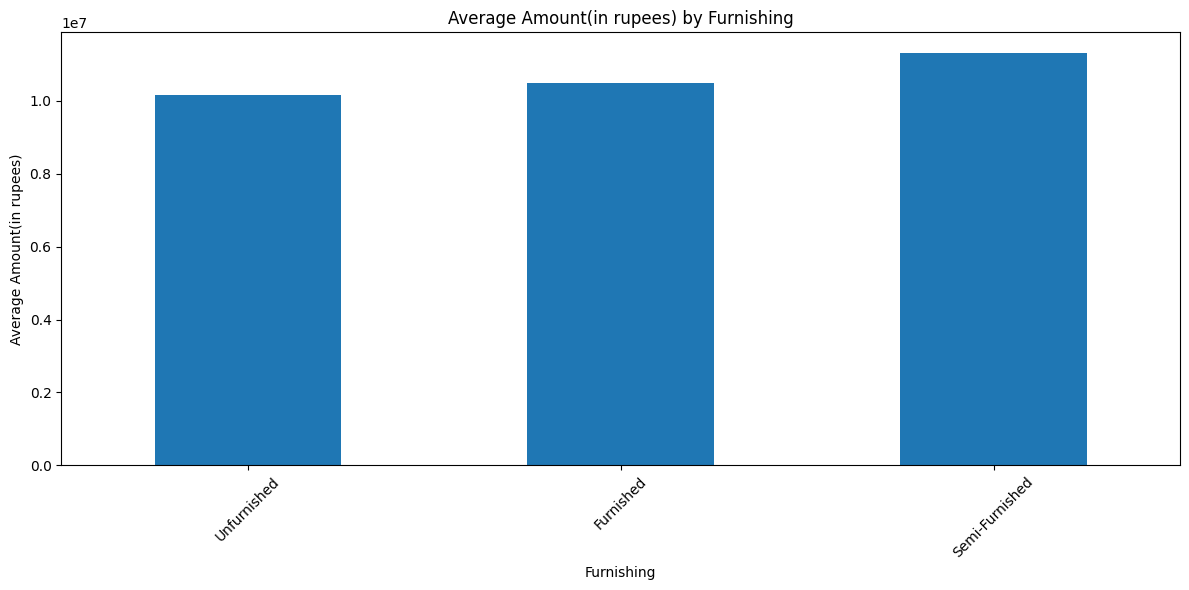

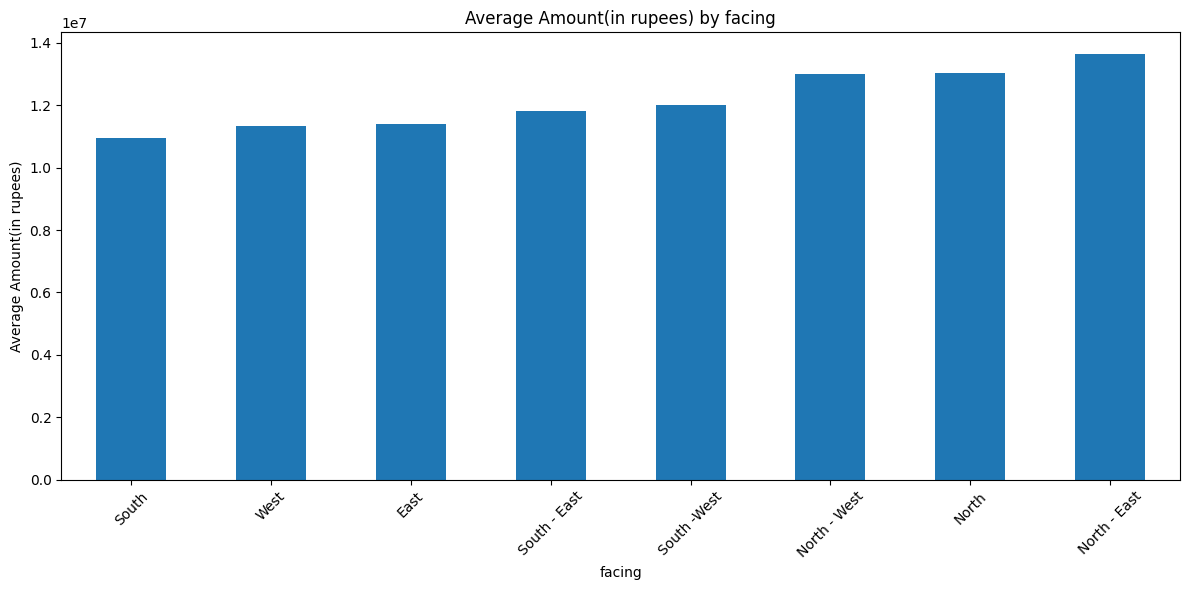

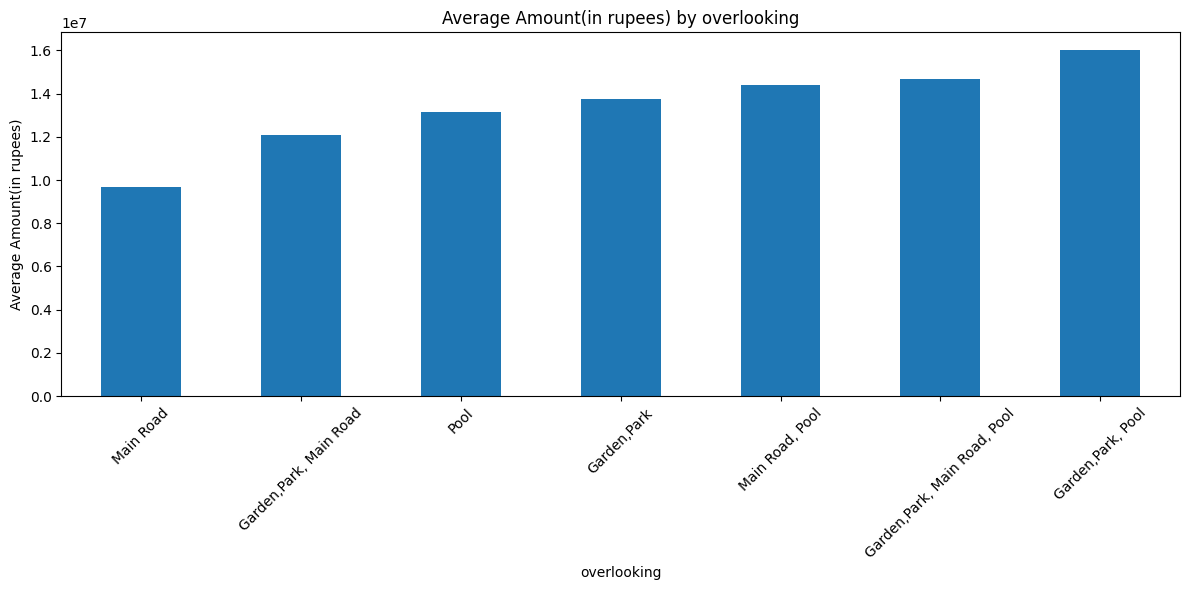

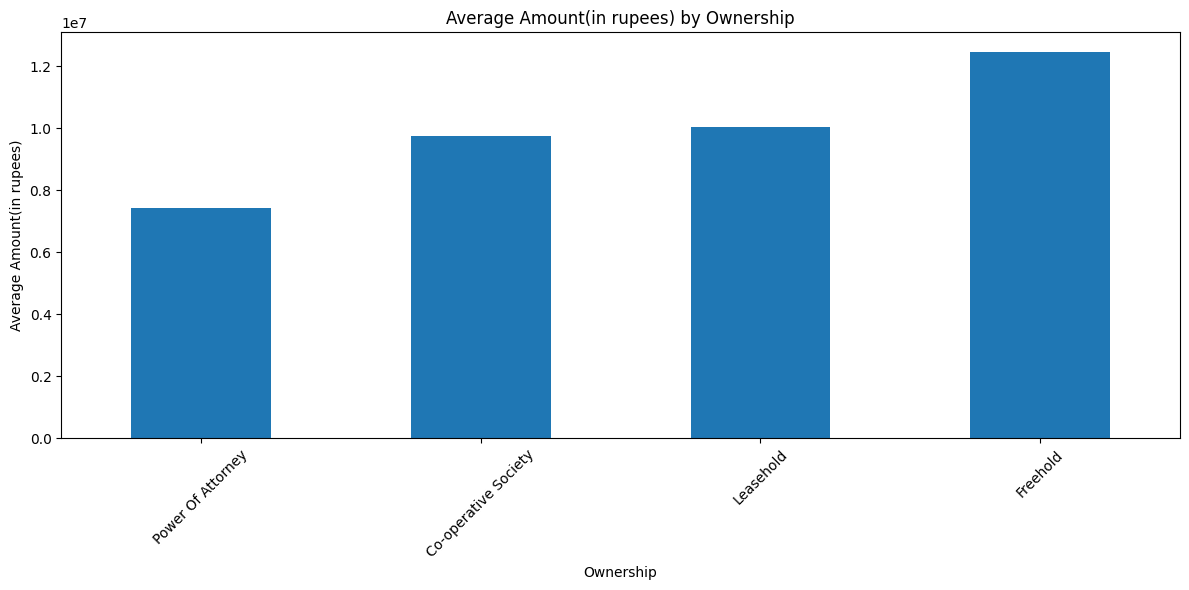

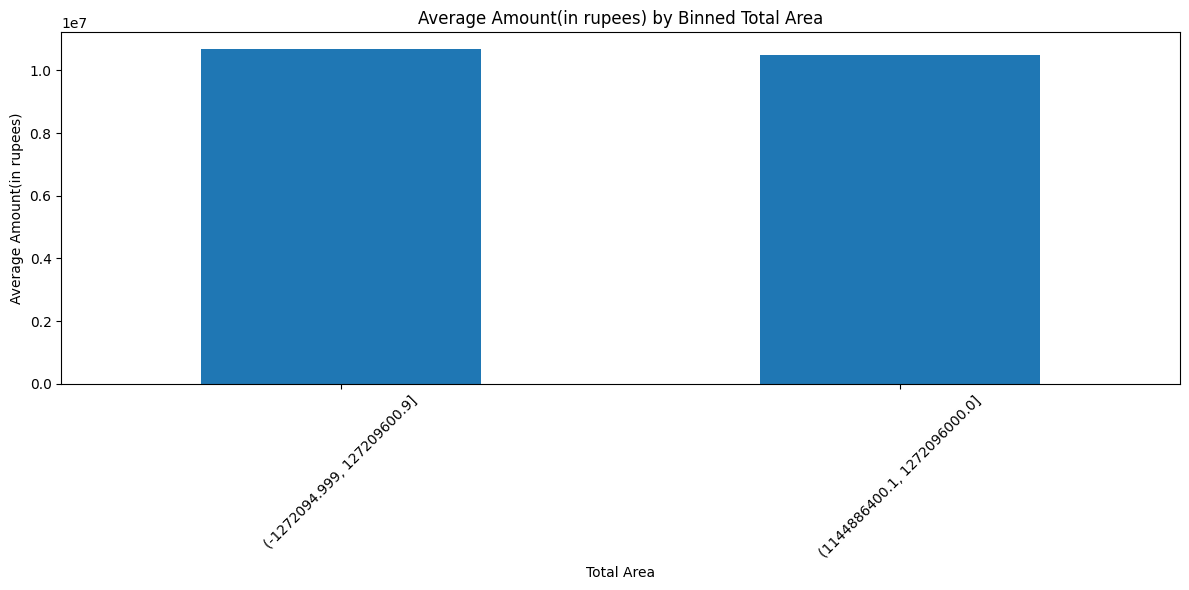

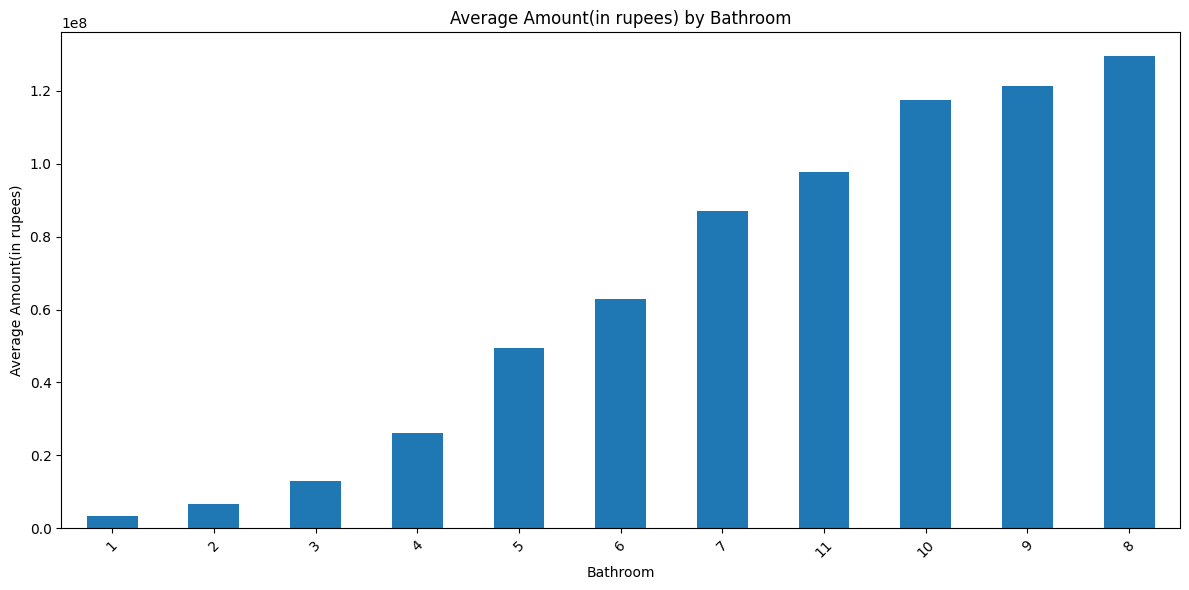

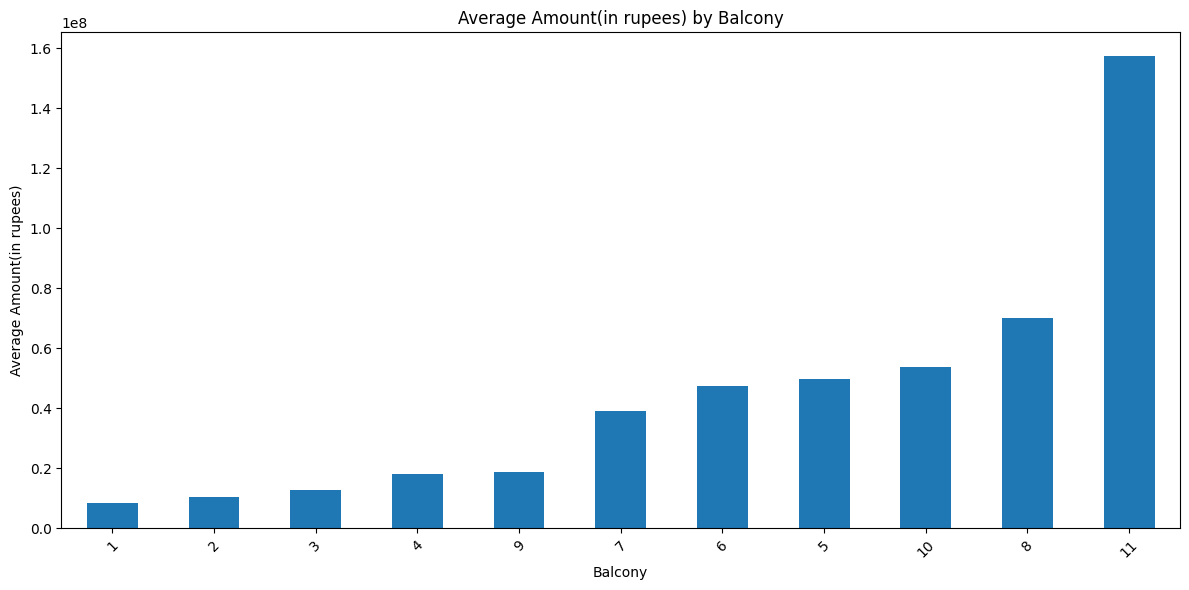

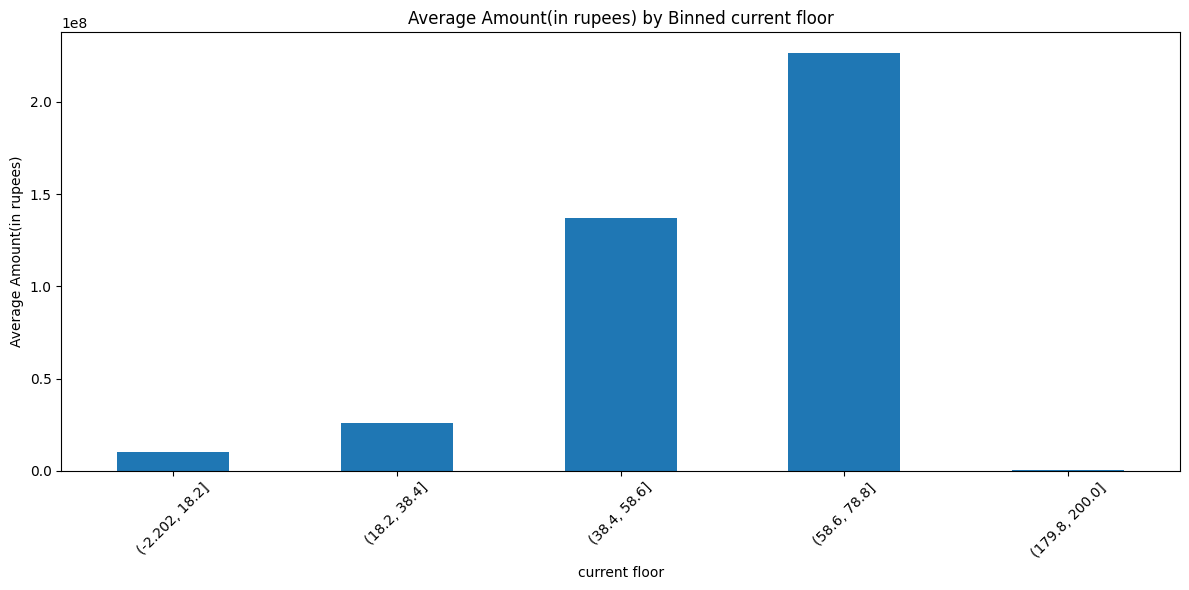

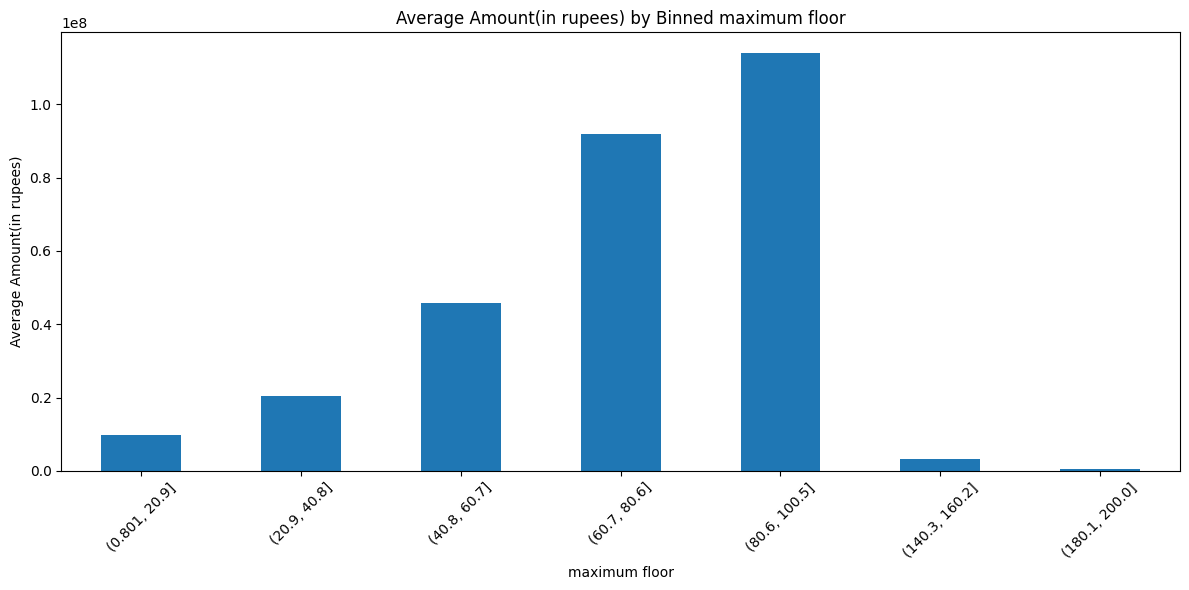

In [50]:
# @title GRAPHS Average Amount with FEATURES
# ===== Plotting =====
target_column = 'Amount(in rupees)'
features = ['Price (in rupees)', 'location', 'Transaction', 'Furnishing',
            'facing', 'overlooking', 'Ownership', 'Total Area',
            'Bathroom', 'Balcony', 'current floor','maximum floor']

for column in features:
    plt.figure(figsize=(12, 6))

    if df[column].dtype == 'object' or df[column].nunique() < 20:
        mean_price = df.groupby(column)[target_column].mean().sort_values()

        mean_price.plot(kind='bar')
        plt.title(f"Average {target_column} by {column}")
        plt.ylabel(f"Average {target_column}")
        plt.xlabel(column)
        plt.xticks(rotation=45)

    else:
        # Για αριθμητικά: κάνε binning
        binned = pd.cut(df[column], bins=10)
       # mean_price = df.groupby(binned)[target_column].mean() warning
        mean_price = df.groupby(binned, observed=True)[target_column].mean() #without warnings
        mean_price.plot(kind='bar')
        plt.title(f"Average {target_column} by Binned {column}")
        plt.ylabel(f"Average {target_column}")
        plt.xlabel(column)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

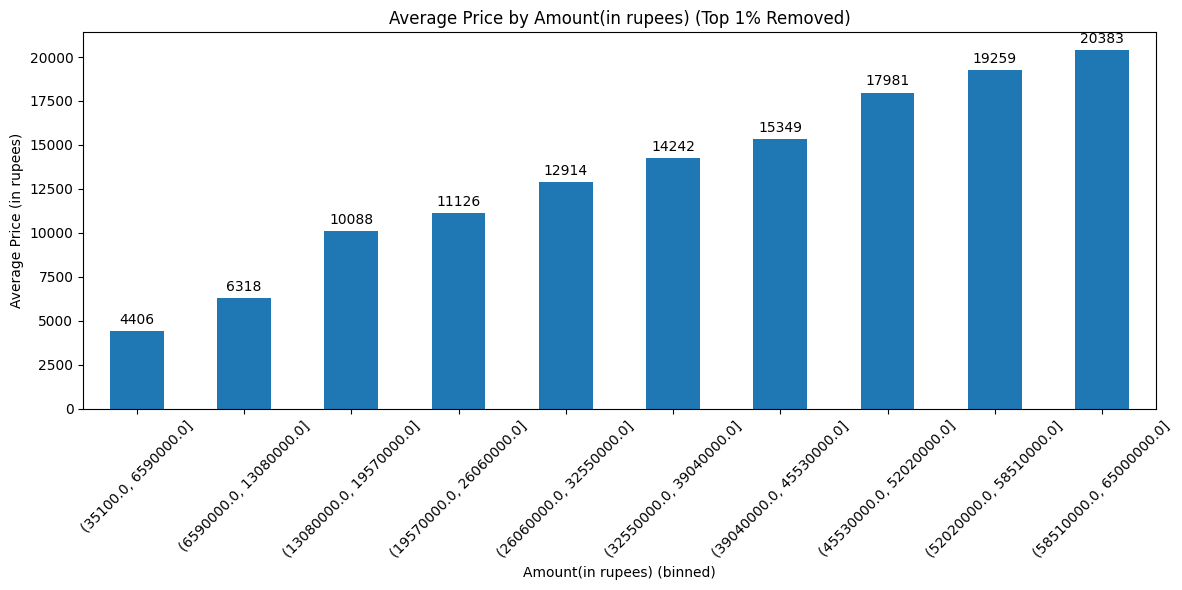

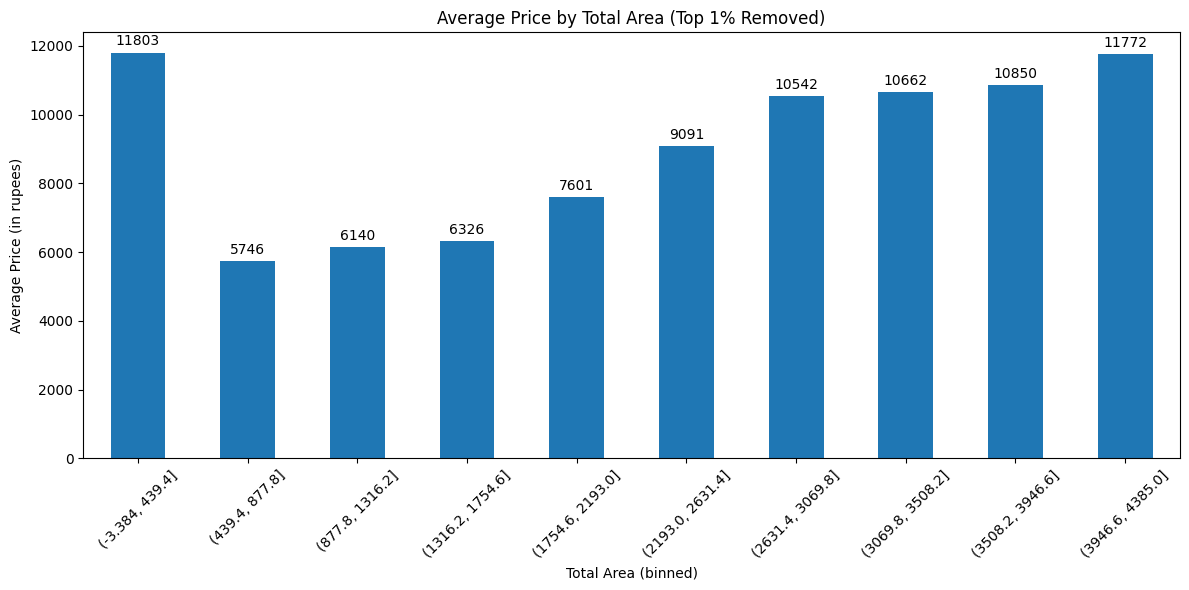

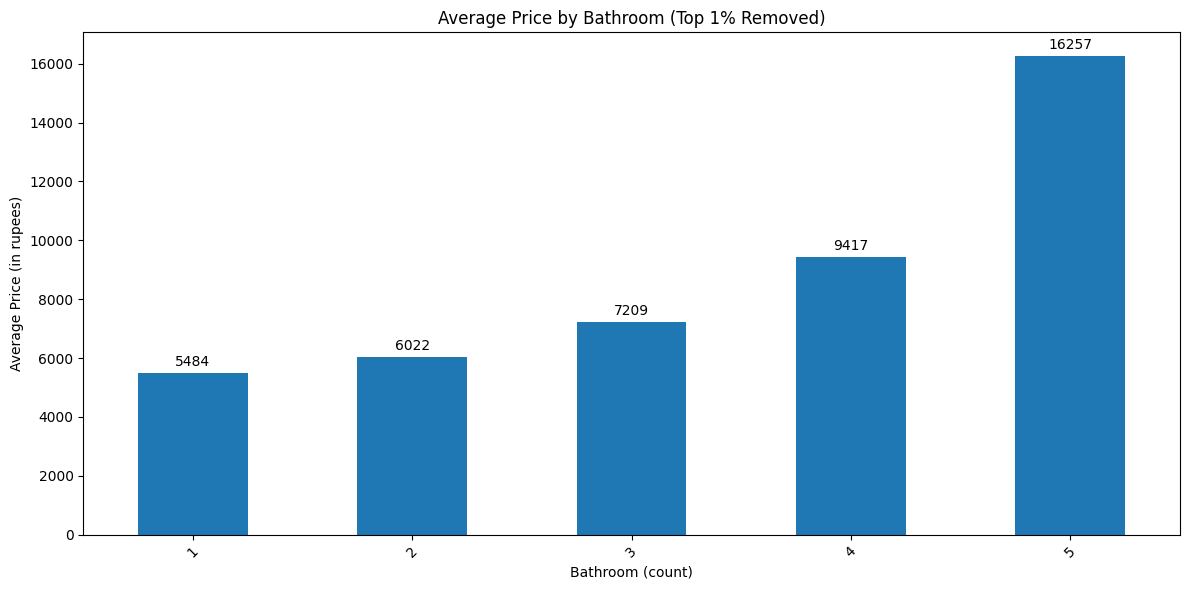

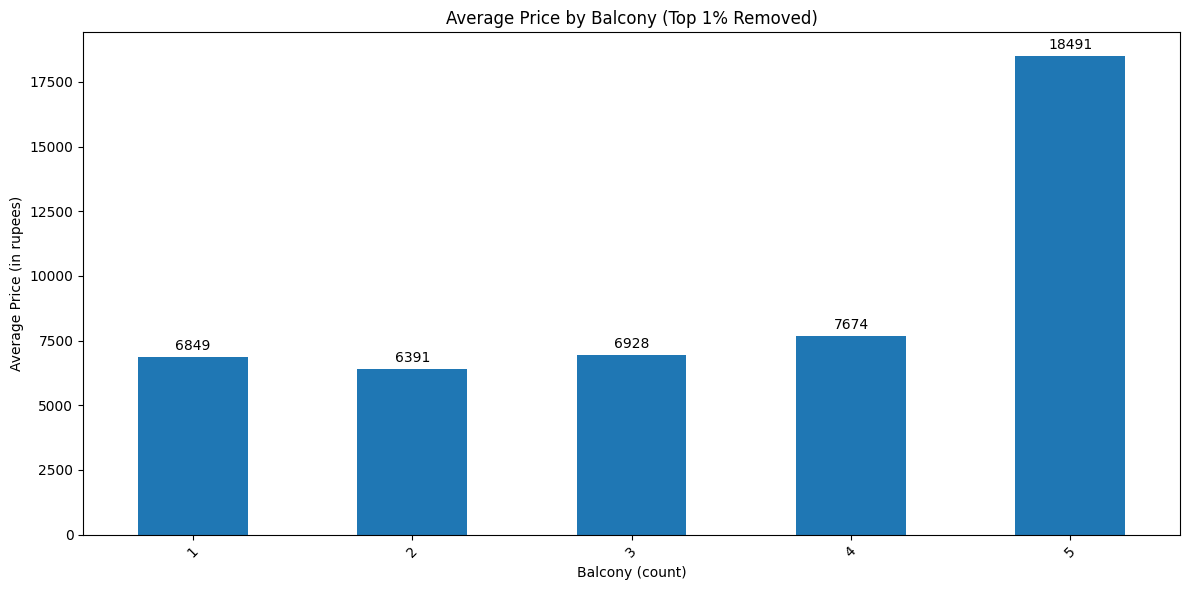

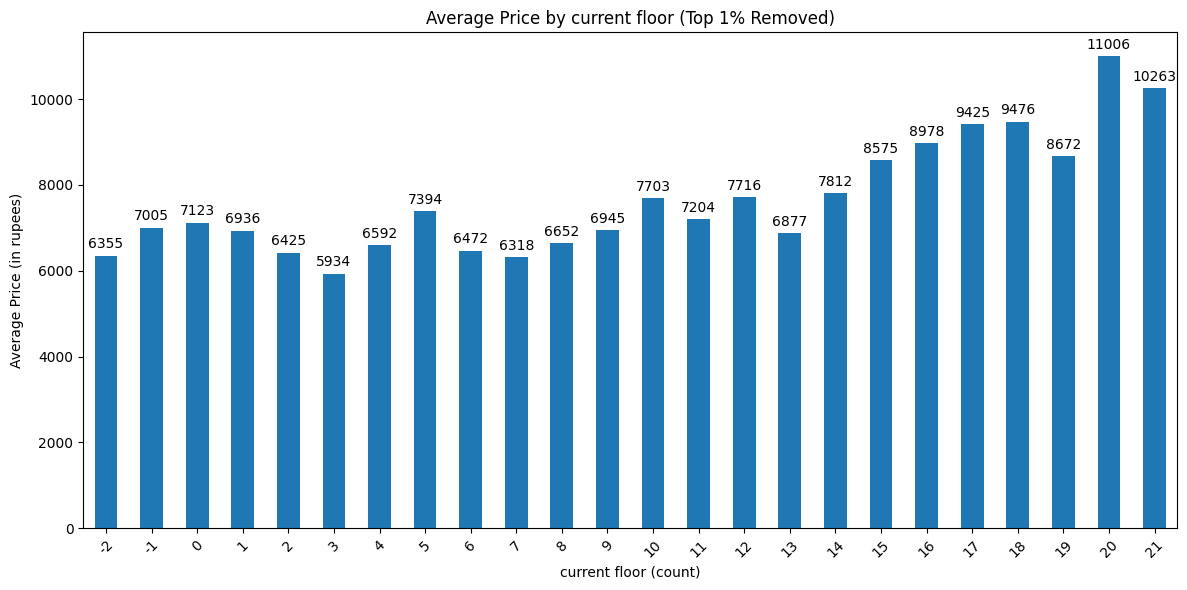

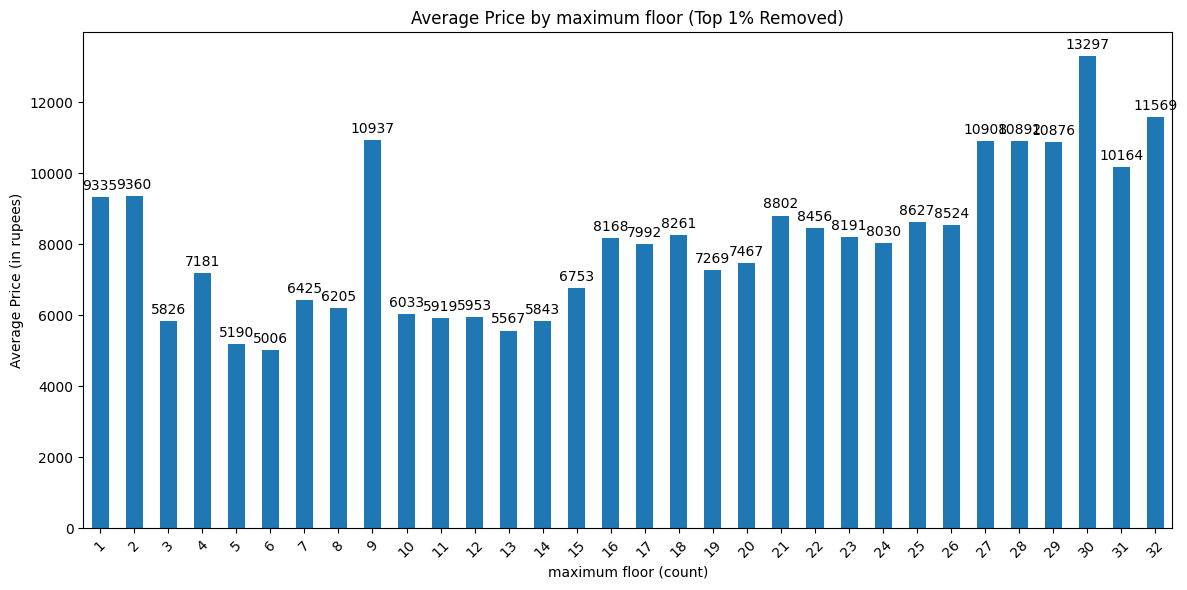

In [51]:
# @title GRAPHS Average Amount with FEATURES without Top 1%

target_column = 'Price (in rupees)'
features = ['Amount(in rupees)', 'Total Area', 'Bathroom', 'Balcony', 'current floor','maximum floor']

# Features to group by as integers directly
integer_bucket_features = ['Bathroom', 'Balcony', 'current floor','maximum floor']

for column in features:
    plt.figure(figsize=(12, 6))

    # Drop missing values and remove top 1% outliers
    filtered = df[[column, target_column]].dropna()
    threshold = filtered[column].quantile(0.99)
    filtered = filtered[filtered[column] <= threshold]

    if column in integer_bucket_features:
        # Round or convert to int, then group
        filtered[column] = filtered[column].astype(int)
        mean_price = filtered.groupby(column)[target_column].mean().sort_index()
        x_label = f"{column} (count)"
    else:
        # Bin into 10 equal-width bins for continuous features
        binned = pd.cut(filtered[column], bins=10)
       # mean_price = filtered.groupby(binned)[target_column].mean().sort_index() warning
        mean_price = filtered.groupby(binned, observed=True)[target_column].mean().sort_index() #without warnings
        x_label = f"{column} (binned)"

    # Plot and add labels
    ax = mean_price.plot(kind='bar')
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=3)

    plt.title(f"Average Price by {column} (Top 1% Removed)")
    plt.xlabel(x_label)
    plt.ylabel("Average Price (in rupees)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Summary statistics for column: Amount(in rupees)
count    6.525500e+04
mean     1.067909e+07
std      6.292519e+07
min      1.000000e+05
25%      4.100000e+06
50%      6.500000e+06
75%      1.090000e+07
max      1.400300e+10
Name: Amount(in rupees), dtype: float64


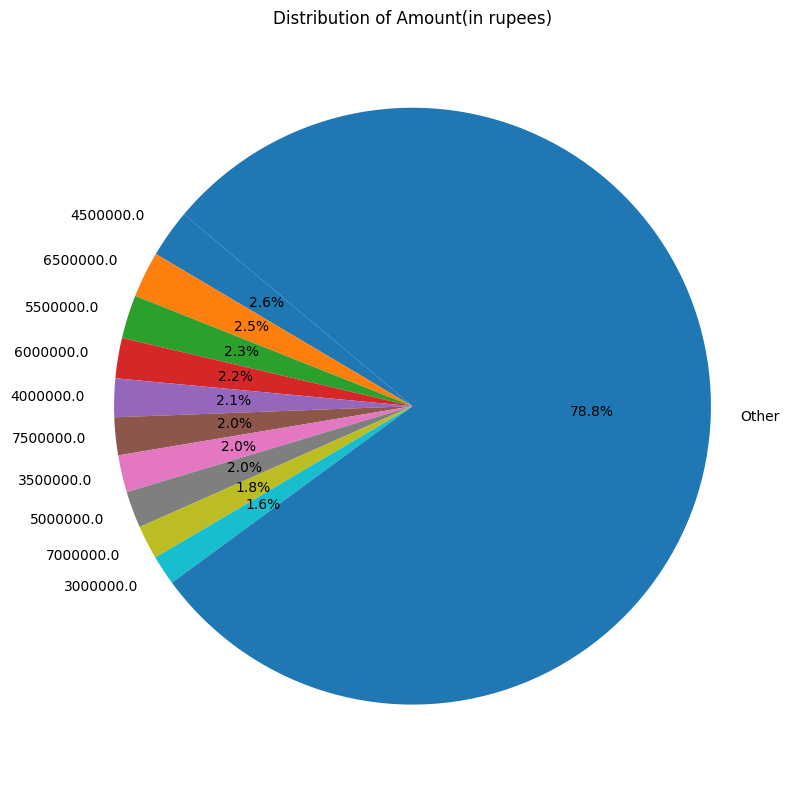

Summary statistics for column: Price (in rupees)
count    6.229800e+04
mean     6.806530e+03
std      4.454801e+04
min      0.000000e+00
25%      3.833000e+03
50%      5.067000e+03
75%      7.106750e+03
max      6.700000e+06
Name: Price (in rupees), dtype: float64


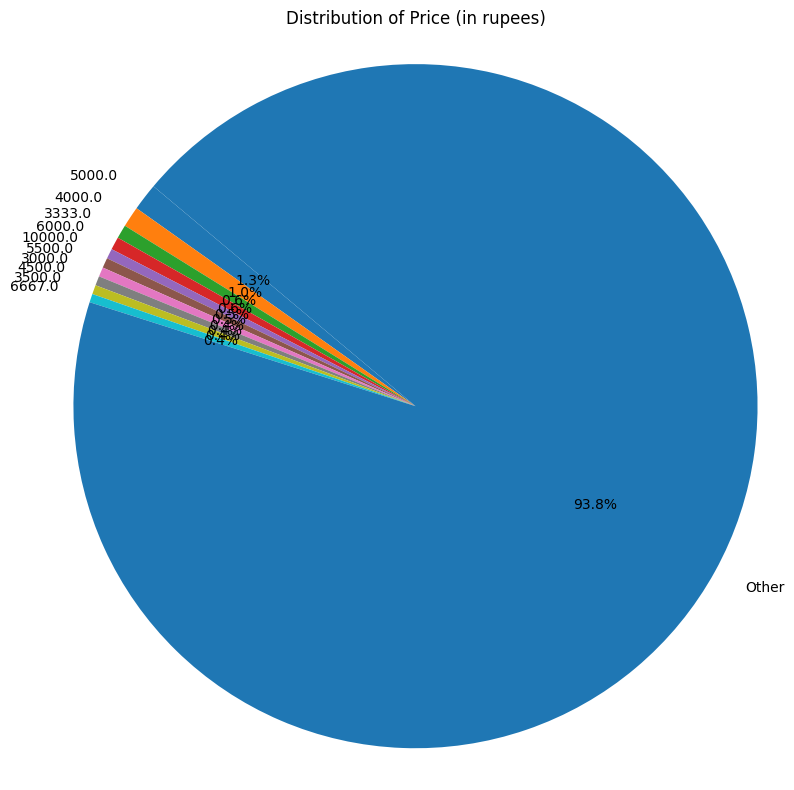

Summary statistics for column: location
count         68192
unique           81
top       faridabad
freq           3000
Name: location, dtype: object


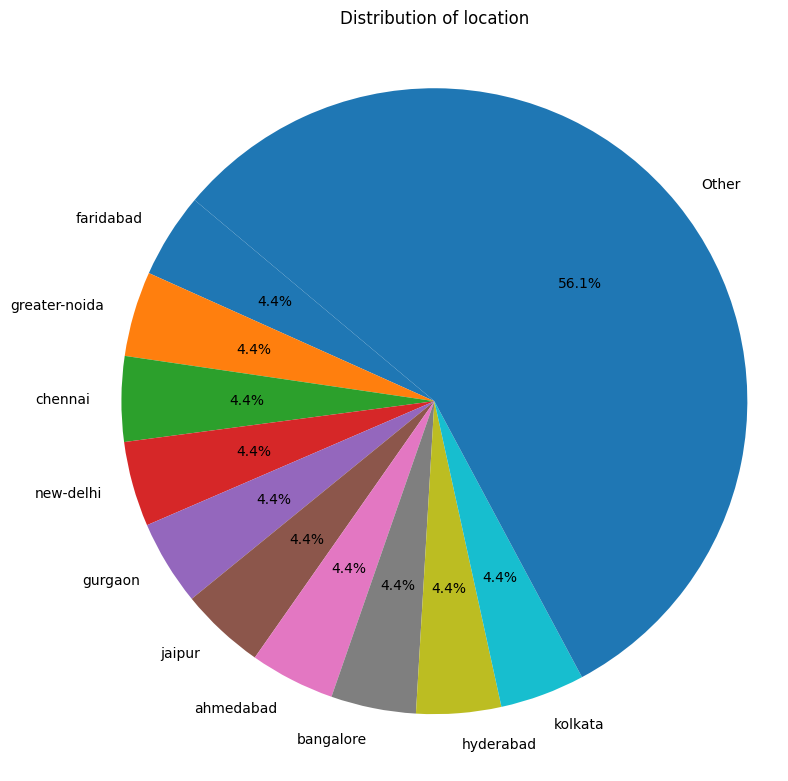

Summary statistics for column: Transaction
count      68114
unique         4
top       Resale
freq       50614
Name: Transaction, dtype: object


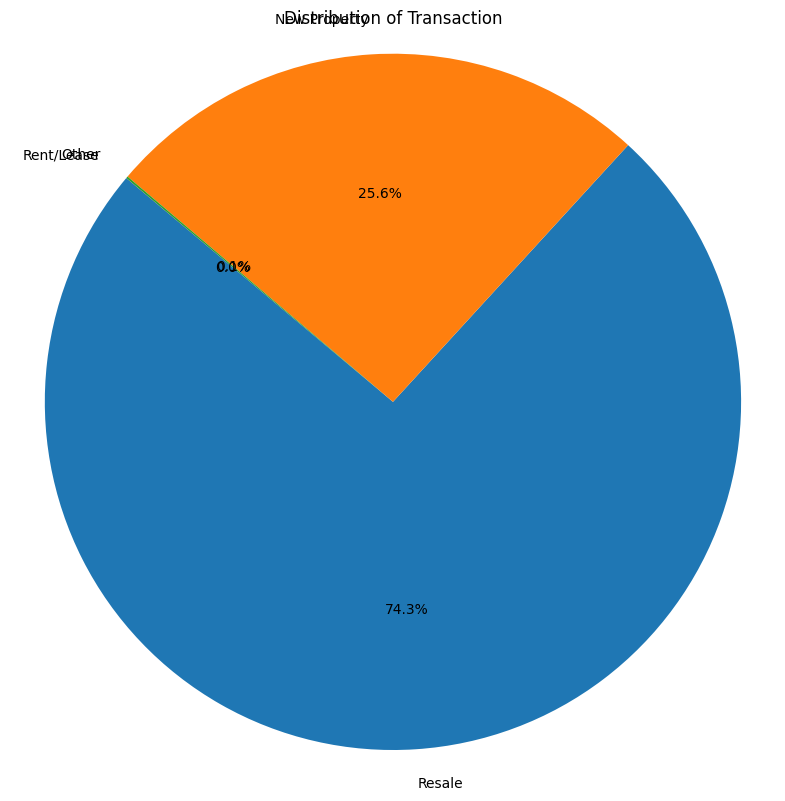

Summary statistics for column: Furnishing
count              66902
unique                 3
top       Semi-Furnished
freq               29248
Name: Furnishing, dtype: object


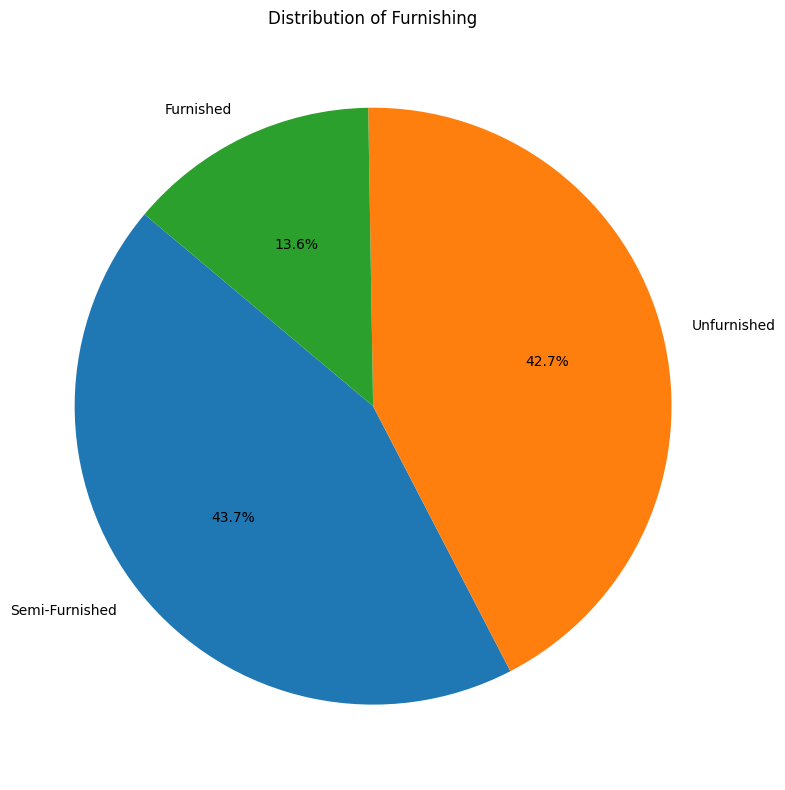

Summary statistics for column: facing
count     41392
unique        8
top        East
freq      19000
Name: facing, dtype: object


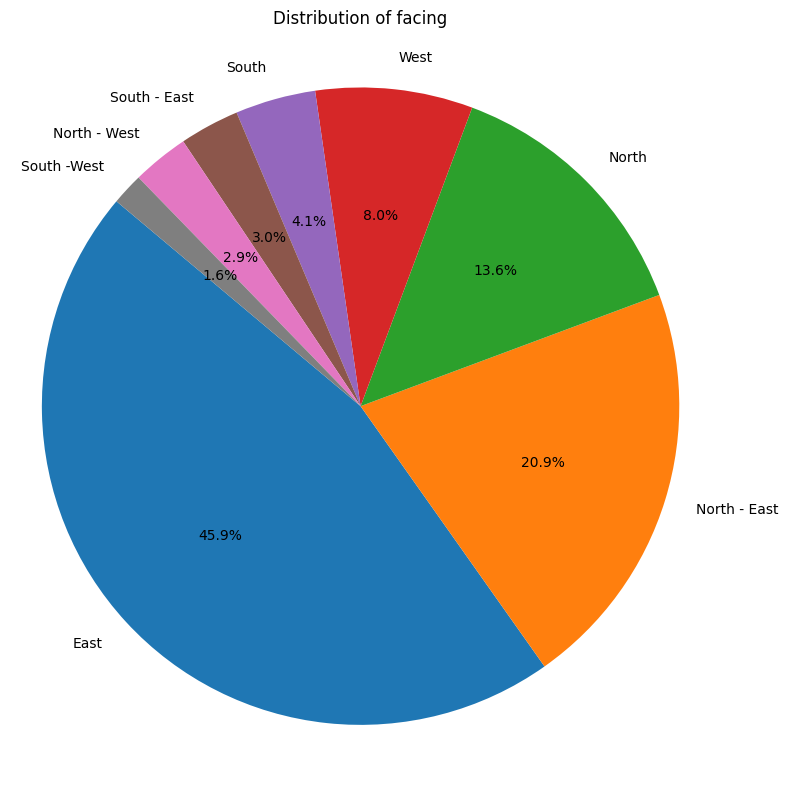

Summary statistics for column: overlooking
count         38657
unique            7
top       Main Road
freq          12249
Name: overlooking, dtype: object


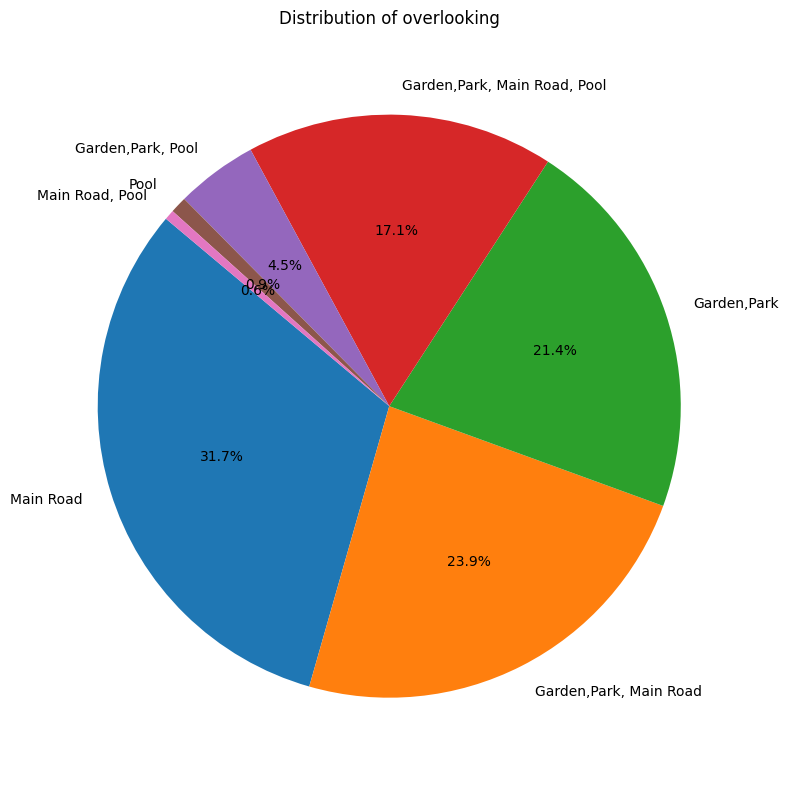

Summary statistics for column: Ownership
count        43264
unique           4
top       Freehold
freq         37341
Name: Ownership, dtype: object


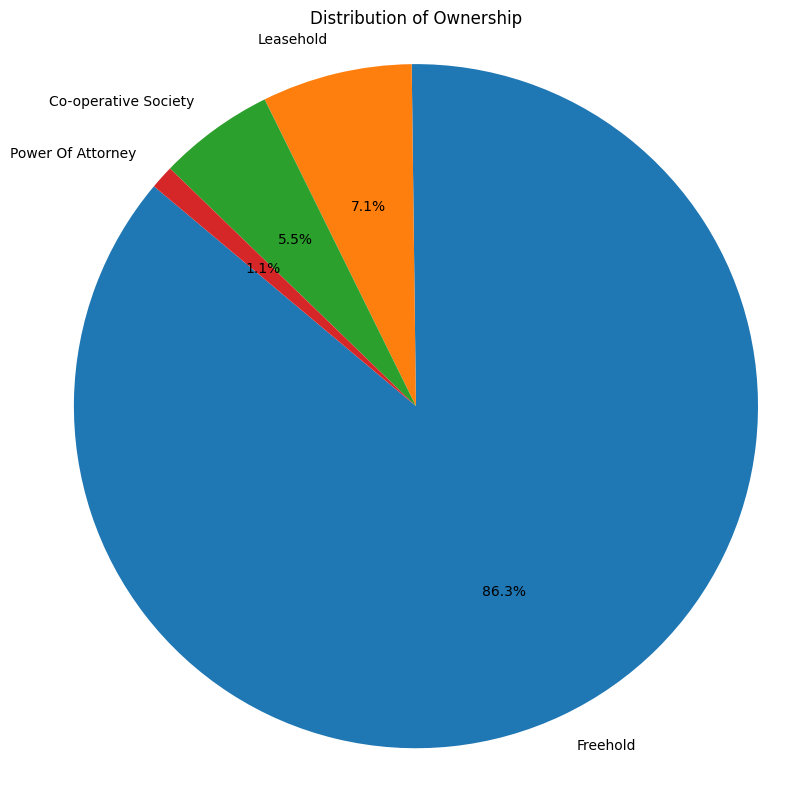

Summary statistics for column: Total Area
count    6.806800e+04
mean     2.304563e+04
std      4.888671e+06
min      1.000000e+00
25%      8.500000e+02
50%      1.150000e+03
75%      1.550000e+03
max      1.272096e+09
Name: Total Area, dtype: float64


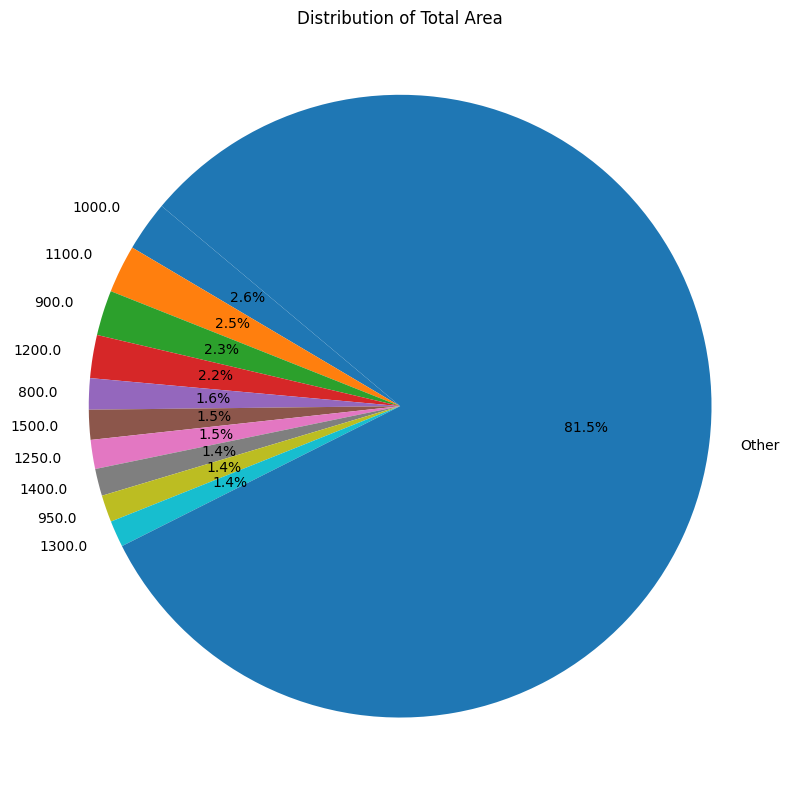

Summary statistics for column: Bathroom
count     67721.0
mean     2.411187
std      0.899991
min           1.0
25%           2.0
50%           2.0
75%           3.0
max          11.0
Name: Bathroom, dtype: Float64


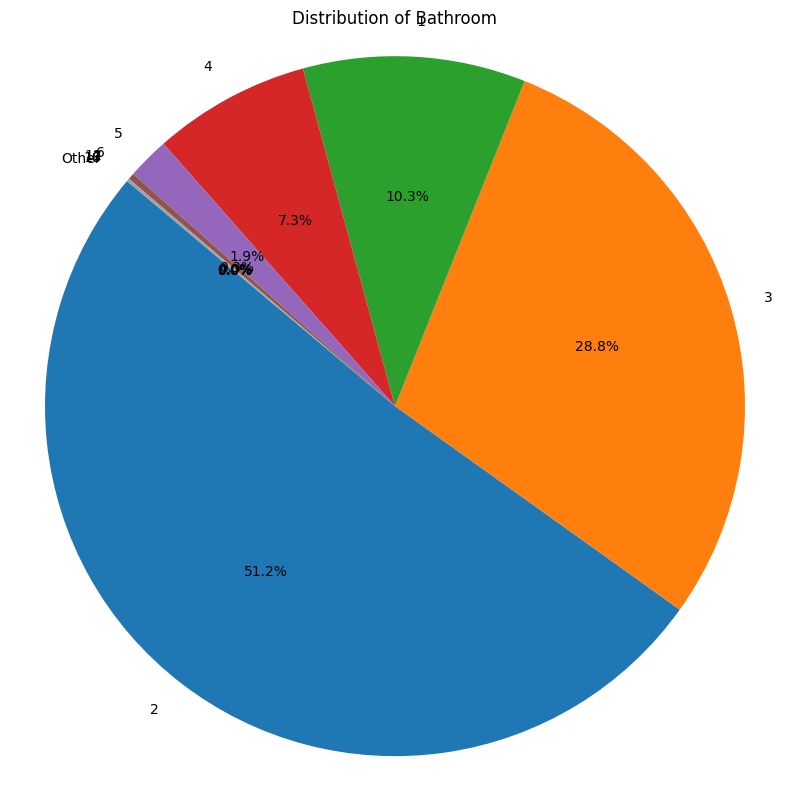

Summary statistics for column: Balcony
count     49133.0
mean     2.087049
std      1.019998
min           1.0
25%           1.0
50%           2.0
75%           3.0
max          11.0
Name: Balcony, dtype: Float64


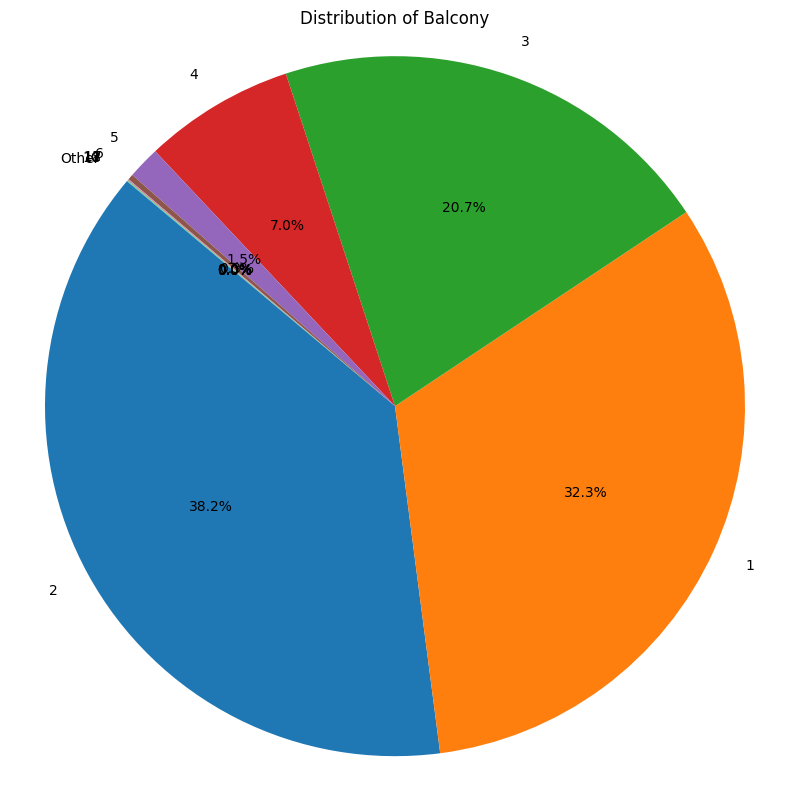

Summary statistics for column: current floor
count    65534.000000
mean         4.311289
std          4.441578
min         -2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        200.000000
Name: current floor, dtype: float64


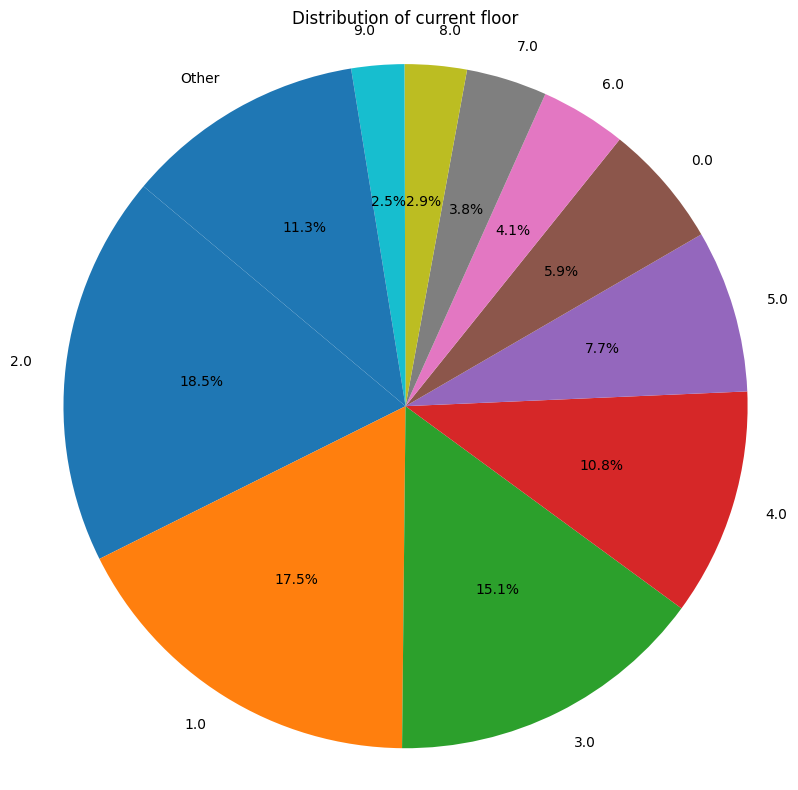

Summary statistics for column: maximum floor
count    65529.000000
mean         8.521281
std          6.964287
min          1.000000
25%          4.000000
50%          5.000000
75%         12.000000
max        200.000000
Name: maximum floor, dtype: float64


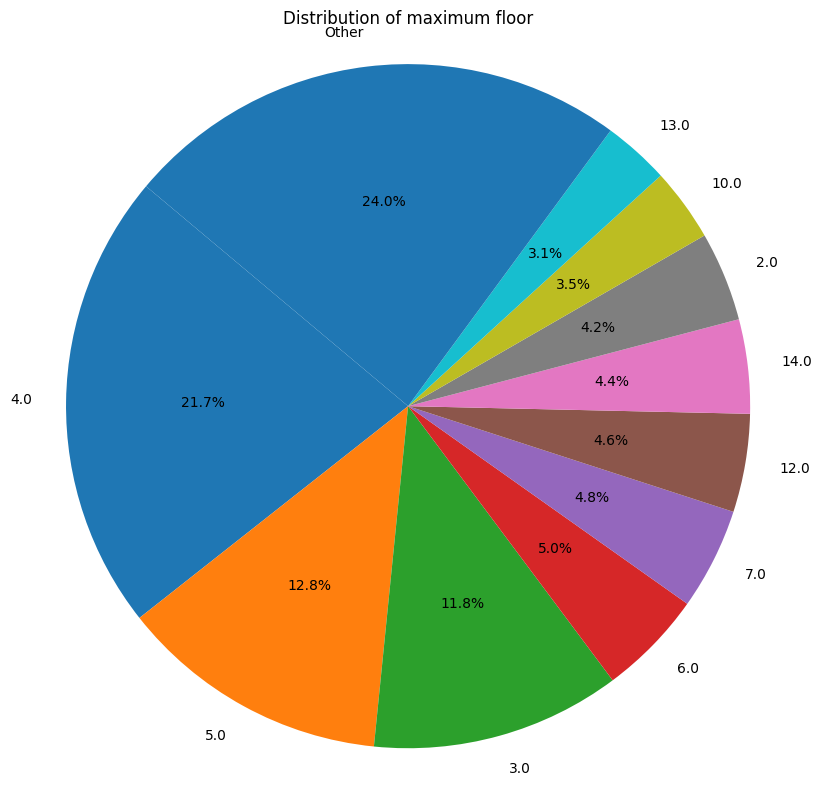

In [52]:
# @title Circle graph

# Columns to analyze
columns = ['Amount(in rupees)', 'Price (in rupees)', 'location', 'Transaction', 'Furnishing',
           'facing', 'overlooking', 'Ownership', 'Total Area', 'Bathroom', 'Balcony', 'current floor','maximum floor']

for column in columns:
    print("Summary statistics for column:", column)
    print(df[column].describe())

    plt.figure(figsize=(8, 8))

    # Drop missing and get value counts
    value_counts = df[column].dropna().value_counts()

    # Top 10 values + other
    top_values = value_counts.head(10)
    other_count = value_counts.iloc[10:].sum()
    if other_count > 0:
        top_values["Other"] = other_count

    # No transformation of index values

    # Plot pie chart
    plt.pie(top_values, labels=top_values.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Distribution of {column}")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


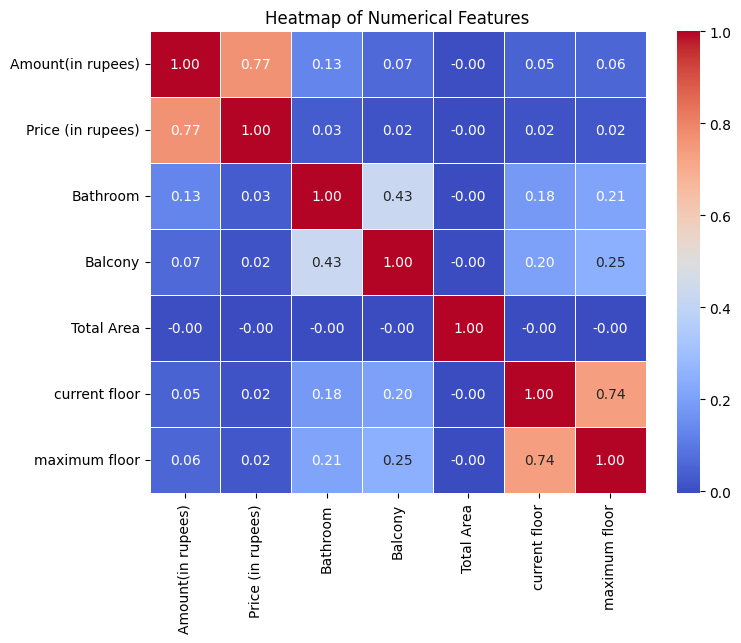

In [53]:
# @title HeatMap

# Select only numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Numerical Features")
plt.show()


In [54]:
# @title SPLIT

from sklearn.model_selection import train_test_split
# Φόρτωσε τα καθαρισμένα δεδομένα
df = pd.read_csv('scaled_house_prices.csv')

# Χωρίζεις features από το target
X = df.drop('Amount(in rupees)', axis=1)  # X= ALL FEATURES EXCEPT TARGET
y = df['Amount(in rupees)']               # Y= TARGET

# Κάνεις το split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Version 1

In [55]:
# @title VERSION 1 Mean,Most Frequent
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder

X_train_V_1 = X_train.copy()
X_test_V_1 = X_test.copy()

# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64','Int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Apply simple imputer with mean strategy on numerical features
si1 = SimpleImputer(strategy='mean')
# fit (train) imputer on the training dataset
si1.fit(X_train_V_1[num_features])
# apply imputation on both training and test datasets
X_train_V_1[num_features] = si1.transform(X_train_V_1[num_features])
X_test_V_1[num_features] = si1.transform(X_test_V_1[num_features])

# ALTERNATIVELY: you could fit and transform training data at the same time and then transform test data separately
#X_train_V_1[num_features] = si1.fit_transform(X_train_V_1[num_features])
#X_test_V_1[num_features] = si1.transform(X_test_V_1[num_features])

# Apply robust scaling on Age and Fare ASK
#rs = RobustScaler()
#features_to_scale = ['Age', 'Fare']
#rs.fit(X_train_V_1[features_to_scale])
#X_train_V_1[features_to_scale] = rs.transform(X_train_V_1[features_to_scale])
#X_test_V_1[features_to_scale] = rs.transform(X_test_V_1[features_to_scale])

# Apply simple imputer with most_frequent strategy on categorical features
si2 = SimpleImputer(strategy='most_frequent')
si2.fit(X_train_V_1[cat_features])
X_train_V_1[cat_features] = si2.transform(X_train_V_1[cat_features])
X_test_V_1[cat_features] = si2.transform(X_test_V_1[cat_features])

# Apply ordinal encoding on categorical features
#ordinal_encoder = OrdinalEncoder(return_df=True,
      #                           handle_unknown='value',   # Handle unknown categories in the test set (at transform time) --> Encode unseen categories with -1
        #                        )

ordinal_encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)
X_train_V_1[cat_features] = ordinal_encoder.fit_transform(X_train_V_1[cat_features])
X_test_V_1[cat_features] = ordinal_encoder.transform(X_test_V_1[cat_features])

#print(X_train_V_1)
#print(X_test_V_1)

In [56]:
# @title VERSION 1 Unskewing
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Replace this with your actual DataFrame
# df_scaled = pd.read_csv("your_cleaned_file.csv")

# Columns you want to transform
columns_to_transform = [
    'Price (in rupees)', 'Total Area',
    'Bathroom', 'Balcony', 'maximum floor', 'current floor'
]

# Create a copy to hold transformed values
df_transformed = X_train_V_1.copy()

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

for col in columns_to_transform:
    try:
        # Reshape and transform
        transformed = pt.fit_transform(X_train_V_1[[col]])
        df_transformed[f'{col} (YeoJ)'] = transformed
    except Exception as e:
        print(f"Error transforming {col}: {e}")

# Print skewness after transformation
for col in columns_to_transform:
    transformed_col = f'{col} (YeoJ)'
    if transformed_col in df_transformed:
        skew_val = df_transformed[transformed_col].skew()
        print(f'{transformed_col} skewness: {skew_val:.4f}')
X_train_V_1=df_transformed.copy()

Price (in rupees) (YeoJ) skewness: 0.0999
Total Area (YeoJ) skewness: -0.2093
Bathroom (YeoJ) skewness: -0.0042
Balcony (YeoJ) skewness: 0.0005
maximum floor (YeoJ) skewness: 0.0506
current floor (YeoJ) skewness: -0.0587


In [59]:
df_scaled.isnull().sum()

Title                    0
Description           2218
Amount(in rupees)     2937
Price (in rupees)     5894
location                 0
Transaction             78
Furnishing            1290
facing               26800
overlooking          29535
Society              38820
Bathroom               471
Balcony              19059
Ownership            24928
Total Area             124
current floor         2658
maximum floor         2663
dtype: int64

In [58]:
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#@title Version 1 Feature Selection
xgb = XGBRegressor()

#Sequential Forward Selection
sfs = SFS(xgb,
           k_features=(5,15),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=10,
           n_jobs=-1)

# Clean labels
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()
valid_indices = y_train.index
X_train_V_1 = X_train_V_1.loc[valid_indices]
y_train = y_train.loc[valid_indices]

# Now fit
sfs = sfs.fit(X_train_V_1, y_train)

print('best combination (R²: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))
print('all subsets:\n', sfs.subsets_)
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   37.8s finished

[2025-04-10 16:45:21] Features: 1/15 -- score: 0.3680190537373556[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

TypeError: must be real number, not NoneType

# Version 2


In [ ]:
# @title VERSION 2 Predict numericals with IterativeImputer,Most frequent
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

X_train_V_2 = X_train.copy()
X_test_V_2 = X_test.copy()

# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64','Int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Predictive imputer για numeric
ii1 = IterativeImputer(random_state=42)
# Fit μόνο στα numeric features του training set
ii1.fit(X_train_V_2[num_features])
# Apply στους πίνακες
X_train_V_2[num_features] = ii1.transform(X_train_V_2[num_features])
X_test_V_2[num_features] = ii1.transform(X_test_V_2[num_features])

# ALTERNATIVELY: you could fit and transform training data at the same time and then transform test data separately
#X_train_V_2[num_features] = si1.fit_transform(X_train_V_2[num_features])
#X_test_V_2[num_features] = si1.transform(X_test_V_2[num_features])

# Apply robust scaling on Age and Fare ASK
#rs = RobustScaler()
#features_to_scale = ['Age', 'Fare']
#rs.fit(X_train_V_1[features_to_scale])
#X_train_V_2[features_to_scale] = rs.transform(X_train_V_2[features_to_scale])
#X_test_V_2[features_to_scale] = rs.transform(X_test_V_2[features_to_scale])

# Apply simple imputer with most_frequent strategy on categorical features
ii2 = SimpleImputer(strategy='most_frequent')
ii2.fit(X_train_V_2[cat_features])
X_train_V_2[cat_features] = ii2.transform(X_train_V_2[cat_features])
X_test_V_2[cat_features] = ii2.transform(X_test_V_2[cat_features])

# Apply ordinal encoding on categorical features
#ordinal_encoder = OrdinalEncoder(return_df=True,handle_unknown='value',   # Handle unknown categories in the test set (at transform time) --> Encode unseen categories with -1)

ordinal_encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)
X_train_V_2[cat_features] = ordinal_encoder.fit_transform(X_train_V_2[cat_features])
X_test_V_2[cat_features] = ordinal_encoder.transform(X_test_V_2[cat_features])

#print(X_train_V_2)
#print(X_test_V_2)

In [ ]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Replace this with your actual DataFrame
# df_scaled = pd.read_csv("your_cleaned_file.csv")

# Columns you want to transform
columns_to_transform = [
    'Price (in rupees)', 'Total Area',
    'Bathroom', 'Balcony', 'maximum floor', 'current floor'
]

# Create a copy to hold transformed values
df_transformed = X_train_V_2.copy()

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

for col in columns_to_transform:
    try:
        # Reshape and transform
        transformed = pt.fit_transform(X_train_V_2[[col]])
        df_transformed[f'{col} (YeoJ)'] = transformed
    except Exception as e:
        print(f"Error transforming {col}: {e}")

# Print skewness after transformation
for col in columns_to_transform:
    transformed_col = f'{col} (YeoJ)'
    if transformed_col in df_transformed:
        skew_val = df_transformed[transformed_col].skew()
        print(f'{transformed_col} skewness: {skew_val:.4f}')
X_train_V_2=df_transformed.copy()

Price (in rupees) (YeoJ) skewness: 0.0999
Total Area (YeoJ) skewness: -0.2093
Bathroom (YeoJ) skewness: -0.0042
Balcony (YeoJ) skewness: -0.7368
maximum floor (YeoJ) skewness: -2.4917
current floor (YeoJ) skewness: -3.6339


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   37.7s finished

[2025-04-05 15:21:53] Features: 1/15 -- score: 0.3731301824601817[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   45.1s finished

[2025-04-05 15:22:38] Features: 2/15 -- score: 0.5320857639415667[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   46.5s finished

[2025-04-05 15:23:24] Features: 3/15 -- score: 0.5320857639415667[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   42.6s finished

[2025-04-05 15:24:07] Features: 4/15 -- score: 0.5314363916445286[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   47.6s finished



best combination (R²: 0.667): (0, 1, 2, 6, 7, 8, 9, 10, 11, 15, 16, 17, 19)

all subsets:
 {1: {'feature_idx': (2,), 'cv_scores': array([0.37452591, 0.36857508, 0.41498635, 0.45689719, 0.45924599,
       0.40878747, 0.39243805, 0.41452738, 0.39300894, 0.04830945]), 'avg_score': np.float64(0.3731301824601817), 'feature_names': ('Price (in rupees)',)}, 2: {'feature_idx': (2, 9), 'cv_scores': array([0.66330742, 0.58265386, 0.60405152, 0.71881606, 0.65190152,
       0.4938475 , 0.57300604, 0.57054455, 0.43176903, 0.03096015]), 'avg_score': np.float64(0.5320857639415667), 'feature_names': ('Price (in rupees)', 'Bathroom')}, 3: {'feature_idx': (2, 9, 17), 'cv_scores': array([0.66330742, 0.58265386, 0.60405152, 0.71881606, 0.65190152,
       0.4938475 , 0.57300604, 0.57054455, 0.43176903, 0.03096015]), 'avg_score': np.float64(0.5320857639415667), 'feature_names': ('Price (in rupees)', 'Bathroom', 'Bathroom (YeoJ)')}, 4: {'feature_idx': (2, 9, 15, 17), 'cv_scores': array([0.66249671, 0.5788245

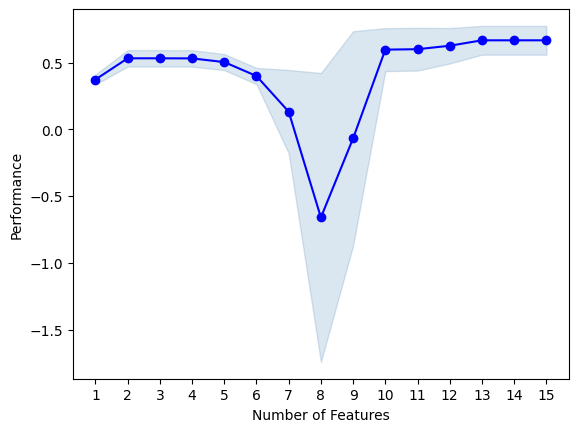

In [ ]:
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#@title Feature Selection
xgb = XGBRegressor()

#Sequential Forward Selection
sfs = SFS(xgb,
           k_features=(5,15),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=10,
           n_jobs=-1)

# Clean labels
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()
valid_indices = y_train.index
X_train_V_2 = X_train_V_2.loc[valid_indices]
y_train = y_train.loc[valid_indices]

# Now fit
sfs = sfs.fit(X_train_V_2, y_train)

print('best combination (R²: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))
print('all subsets:\n', sfs.subsets_)
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.show()

# Version 3

In [ ]:
# @title VERSION 3 Median,Most Frequent
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder

X_train_V_3 = X_train.copy()
X_test_V_3 = X_test.copy()

# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64','Int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Apply simple imputer with mean strategy on numerical features
si6 = SimpleImputer(strategy='median')
# fit (train) imputer on the training dataset
si6.fit(X_train_V_3[num_features])
# apply imputation on both training and test datasets
X_train_V_3[num_features] = si6.transform(X_train_V_3[num_features])
X_test_V_3[num_features] = si6.transform(X_test_V_3[num_features])

# ALTERNATIVELY: you could fit and transform training data at the same time and then transform test data separately
#X_train_V_3[num_features] = si6.fit_transform(X_train_V_3[num_features])
#X_test_V_3[num_features] = si6.transform(X_test_V_3[num_features])

# Apply robust scaling on Age and Fare ASK
#rs = RobustScaler()
#features_to_scale = ['Age', 'Fare']
#rs.fit(X_train_V_3[features_to_scale])
#X_train_V_3[features_to_scale] = rs.transform(X_train_V_3[features_to_scale])
#X_test_V_3[features_to_scale] = rs.transform(X_test_V_3[features_to_scale])

# Apply simple imputer with most_frequent strategy on categorical features
si7 = SimpleImputer(strategy='most_frequent')
si7.fit(X_train_V_3[cat_features])
X_train_V_3[cat_features] = si7.transform(X_train_V_3[cat_features])
X_test_V_3[cat_features] = si7.transform(X_test_V_3[cat_features])

# Apply ordinal encoding on categorical features
#ordinal_encoder = OrdinalEncoder(return_df=True,
      #                           handle_unknown='value',   # Handle unknown categories in the test set (at transform time) --> Encode unseen categories with -1
        #                        )

ordinal_encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

X_train_V_3[cat_features] = ordinal_encoder.fit_transform(X_train_V_3[cat_features])

# Transform test (no fitting!)
X_test_V_3[cat_features] = ordinal_encoder.transform(X_test_V_3[cat_features])


#print(X_train_V_1)
#print(X_test_V_1)

In [ ]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Replace this with your actual DataFrame
# df_scaled = pd.read_csv("your_cleaned_file.csv")

# Columns you want to transform
columns_to_transform = [
    'Price (in rupees)', 'Total Area',
    'Bathroom', 'Balcony', 'maximum floor', 'current floor'
]

# Create a copy to hold transformed values
df_transformed = X_train_V_3.copy()

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

for col in columns_to_transform:
    try:
        # Reshape and transform
        transformed = pt.fit_transform(X_train_V_3[[col]])
        df_transformed[f'{col} (YeoJ)'] = transformed
    except Exception as e:
        print(f"Error transforming {col}: {e}")

# Print skewness after transformation
for col in columns_to_transform:
    transformed_col = f'{col} (YeoJ)'
    if transformed_col in df_transformed:
        skew_val = df_transformed[transformed_col].skew()
        print(f'{transformed_col} skewness: {skew_val:.4f}')
X_train_V_3=df_transformed.copy()

Price (in rupees) (YeoJ) skewness: 0.0767
Total Area (YeoJ) skewness: -0.1734
Bathroom (YeoJ) skewness: -0.0046
Balcony (YeoJ) skewness: 0.0025
maximum floor (YeoJ) skewness: 0.0586
current floor (YeoJ) skewness: -0.0697


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   50.3s finished

[2025-04-05 15:46:00] Features: 1/15 -- score: 0.368099098634577[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   43.9s finished

[2025-04-05 15:46:44] Features: 2/15 -- score: 0.48987867554009623[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   44.9s finished

[2025-04-05 15:47:29] Features: 3/15 -- score: 0.48987867554009623[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   46.5s finished

[2025-04-05 15:48:16] Features: 4/15 -- score: 0.48987867554009623[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   45.3s finished

best combination (R²: 0.586): (1, 2, 5, 8, 9, 10, 11, 14, 15, 16, 17, 18, 20)

all subsets:
 {1: {'feature_idx': (2,), 'cv_scores': array([0.37290344, 0.36220542, 0.41191198, 0.45566619, 0.45385821,
       0.40616444, 0.38819371, 0.3938981 , 0.38850127, 0.04768822]), 'avg_score': np.float64(0.368099098634577), 'feature_names': ('Price (in rupees)',)}, 2: {'feature_idx': (2, 9), 'cv_scores': array([0.64511374, 0.58500164, 0.59947114, 0.40601179, 0.65144888,
       0.41045881, 0.56858559, 0.59136316, 0.4121929 , 0.02913911]), 'avg_score': np.float64(0.48987867554009623), 'feature_names': ('Price (in rupees)', 'Bathroom')}, 3: {'feature_idx': (2, 9, 15), 'cv_scores': array([0.64511374, 0.58500164, 0.59947114, 0.40601179, 0.65144888,
       0.41045881, 0.56858559, 0.59136316, 0.4121929 , 0.02913911]), 'avg_score': np.float64(0.48987867554009623), 'feature_names': ('Price (in rupees)', 'Bathroom', 'Price (in rupees) (YeoJ)')}, 4: {'feature_idx': (2, 9, 15, 17), 'cv_scores': array([0.6451137

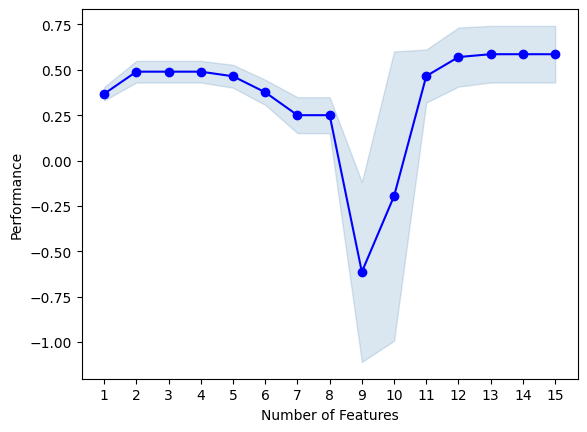

In [ ]:
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#@title Feature Selection
xgb = XGBRegressor()

#Sequential Forward Selection
sfs = SFS(xgb,
           k_features=(5,15),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=10,
           n_jobs=-1)

# Clean labels
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()
valid_indices = y_train.index
X_train_V_3 = X_train_V_3.loc[valid_indices]
y_train = y_train.loc[valid_indices]

# Now fit
sfs = sfs.fit(X_train_V_3, y_train)

print('best combination (R²: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))
print('all subsets:\n', sfs.subsets_)
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.show()